# John Mayers
MSDS 664 Practicum I | Fall 2021

I am going to look at crime by Denver neighborhood and visualize where crime is the highest. I am going to look at crime over time and relative to certain features, like the number of marijuana dispensaries and bars in a neighborhood. I am also going to find demographic information and merge that with crime data [based on neighborhoods] to see if there is a correlation between variables, such as age, race, income, etc., and crime. I will use multivariate and time series analysis to predict future crimes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Here are crime data for Denver. I am interested in figuring out the total crime for each neighborhood.

In [2]:
crime = pd.read_csv("C:/Users/john_/Documents/crime.csv") 

# csv from https://denvergov.org/opendata/dataset/city-and-county-of-denver-crime

In [3]:
crime.tail()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
513433,2021488600,2021488600230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,8/24/2021 5:30:00 PM,NaN,8/25/2021 4:46:00 PM,1445 S FEDERAL BLVD,3133461.0,1676618.0,-105.025760,39.690160,4.0,421.0,mar-lee,1,0
513434,20218038574,20218038574531200,5312,0,disturbing-the-peace,public-disorder,8/25/2021 8:30:00 PM,NaN,8/25/2021 11:02:00 PM,8300 PENA BLVD,3231944.0,1734631.0,-104.673951,39.847478,7.0,759.0,dia,1,0
513435,2021488382,2021488382544100,5441,0,traffic-accident,traffic-accident,8/25/2021 2:41:00 PM,NaN,8/25/2021 4:07:00 PM,S FEDERAL BLVD / W COLORADO AVE,3133672.0,1674729.0,-105.025045,39.684971,4.0,421.0,mar-lee,0,1
513436,20215003395,20215003395131302,1313,2,assault-dv,other-crimes-against-persons,8/22/2021 8:30:00 PM,NaN,8/22/2021 8:44:00 PM,5213 N ELKHART ST,3192627.0,1712850.0,-104.814555,39.788586,5.0,521.0,montbello,1,0
513437,2021489195,2021489195240400,2404,0,theft-of-motor-vehicle,auto-theft,8/18/2021 3:05:00 AM,8/25/2021 9:29:00 PM,8/25/2021 9:29:00 PM,4310 N AIRPORT WAY,3198146.0,1707824.0,-104.795056,39.774673,5.0,522.0,gateway-green-valley-ranch,1,0


In [4]:
crime_copy = crime.copy() # making a copy

In [5]:
display(list(crime_copy.columns.values))

['INCIDENT_ID',
 'OFFENSE_ID',
 'OFFENSE_CODE',
 'OFFENSE_CODE_EXTENSION',
 'OFFENSE_TYPE_ID',
 'OFFENSE_CATEGORY_ID',
 'FIRST_OCCURRENCE_DATE',
 'LAST_OCCURRENCE_DATE',
 'REPORTED_DATE',
 'INCIDENT_ADDRESS',
 'GEO_X',
 'GEO_Y',
 'GEO_LON',
 'GEO_LAT',
 'DISTRICT_ID',
 'PRECINCT_ID',
 'NEIGHBORHOOD_ID',
 'IS_CRIME',
 'IS_TRAFFIC']

In [6]:
crime1 = crime_copy.loc[:, ['NEIGHBORHOOD_ID','OFFENSE_CODE', 'OFFENSE_TYPE_ID',]]
crime1

,NEIGHBORHOOD_ID,OFFENSE_CODE,OFFENSE_TYPE_ID
0,civic-center,2202,burglary-residence-by-force
1,bear-valley,2404,theft-of-motor-vehicle
2,cole,2399,theft-other
3,platt-park,2305,theft-items-from-vehicle
4,dia,2404,theft-of-motor-vehicle
...,...,...,...
513433,mar-lee,2305,theft-items-from-vehicle
513434,dia,5312,disturbing-the-peace
513435,mar-lee,5441,traffic-accident
513436,montbello,1313,assault-dv


Here are the most common types of crimes for the whole city.

In [7]:
crime_copy['OFFENSE_TYPE_ID'].value_counts()

traffic-accident                82227
theft-of-motor-vehicle          36914
traffic-accident-hit-and-run    36438
theft-items-from-vehicle        33031
traf-other                      25943
                                ...  
theft-from-yards                    1
homicide-negligent                  1
theft-of-cable-services             1
riot                                1
riot-incite                         1
Name: OFFENSE_TYPE_ID, Length: 200, dtype: int64

Next I will compute the total number of crimes per neighborhood.

In [8]:
crime2 = crime1.NEIGHBORHOOD_ID.value_counts().reset_index() # total crimes per neighborhood
crime2


,index,NEIGHBORHOOD_ID
0,five-points,27806
1,central-park,21392
2,capitol-hill,18472
3,cbd,17369
4,montbello,17241
...,...,...
74,skyland,1924
75,rosedale,1615
76,country-club,1223
77,indian-creek,687


In [9]:
crime2.columns

Index(['index', 'NEIGHBORHOOD_ID'], dtype='object')

In [10]:
print(type(crime2))

<class 'pandas.core.frame.DataFrame'>


Now I have a dataframe with total crime for each neighborhood.

In [11]:
crime2.rename(columns = {'index':'NBHD_NAME', 'NEIGHBORHOOD_ID': 'TOTAL_CRIME' }, inplace=True)
crime2

,NBHD_NAME,TOTAL_CRIME
0,five-points,27806
1,central-park,21392
2,capitol-hill,18472
3,cbd,17369
4,montbello,17241
...,...,...
74,skyland,1924
75,rosedale,1615
76,country-club,1223
77,indian-creek,687


I'll clean it up a bit more.

In [12]:
crime2['NBHD_NAME']= crime2['NBHD_NAME'].str.replace('-',' ') # removing the hyphens
crime2['NBHD_NAME'] = crime2['NBHD_NAME'].str.upper() # all caps 

In [13]:
crime2

,NBHD_NAME,TOTAL_CRIME
0,FIVE POINTS,27806
1,CENTRAL PARK,21392
2,CAPITOL HILL,18472
3,CBD,17369
4,MONTBELLO,17241
...,...,...
74,SKYLAND,1924
75,ROSEDALE,1615
76,COUNTRY CLUB,1223
77,INDIAN CREEK,687


Just to get a sense for the unique values in my new dataframe. Everything looks fine. I need to make sure the other tables match the NBHD_NAMES.

In [14]:
cols = crime2.columns 

for i in range(len(cols)):
    print(cols[i],'::',crime2[cols[i]].unique())

NBHD_NAME :: ['FIVE POINTS' 'CENTRAL PARK' 'CAPITOL HILL' 'CBD' 'MONTBELLO' 'BAKER'
 'UNION STATION' 'LINCOLN PARK' 'CIVIC CENTER' 'EAST COLFAX'
 'GATEWAY GREEN VALLEY RANCH' 'WESTWOOD' 'WEST COLFAX' 'DIA'
 'NORTHEAST PARK HILL' 'NORTH CAPITOL HILL' 'HIGHLAND' 'HAMPDEN SOUTH'
 'HAMPDEN' 'SPEER' 'GLOBEVILLE' 'ELYRIA SWANSEA'
 'WASHINGTON VIRGINIA VALE' 'CHEESMAN PARK' 'VILLA PARK' 'MAR LEE'
 'CITY PARK WEST' 'ATHMAR PARK' 'COLLEGE VIEW SOUTH PLATTE' 'SUNNYSIDE'
 'RUBY HILL' 'VIRGINIA VILLAGE' 'CHERRY CREEK' 'HARVEY PARK'
 'CONGRESS PARK' 'BARNUM' 'OVERLAND' 'BERKELEY' 'JEFFERSON PARK'
 'WEST HIGHLAND' 'AURARIA' 'GOLDSMITH' 'WINDSOR' 'LOWRY FIELD'
 'WASHINGTON PARK WEST' 'MONTCLAIR' 'HALE' 'UNIVERSITY HILLS' 'SLOAN LAKE'
 'UNIVERSITY' 'HARVEY PARK SOUTH' 'SUN VALLEY' 'SOUTH PARK HILL' 'MARSTON'
 'UNIVERSITY PARK' 'NORTH PARK HILL' 'VALVERDE' 'CLAYTON' 'COLE'
 'BEAR VALLEY' 'PLATT PARK' 'BARNUM WEST' 'HILLTOP' 'WHITTIER'
 'WASHINGTON PARK' 'SOUTHMOOR PARK' 'CORY MERRILL' 'CITY PARK' 'REGI

I know I don't have missing data but I can check.

In [15]:
def count_missing(vec): 
    null_vec = pd.isnull(vec)
    null_count = np.sum(null_vec)
    return null_count

In [16]:
missing = crime2.apply(count_missing)
print(missing)

NBHD_NAME      0
TOTAL_CRIME    0
dtype: int64


Next I will prepare my data data in order to conduct a year over year review of crime.

In [17]:
from datetime import time

In [18]:
crime_copy['REPORTED_DATE'] = pd.to_datetime(crime_copy['REPORTED_DATE']) # convert to pandas datatime class (this take a min)
crime_copy['REPORTED_DATE']

0        2021-04-21 15:25:00
1        2021-04-22 00:01:00
2        2021-04-21 22:13:00
3        2021-04-21 13:17:00
4        2021-04-21 12:20:00
                 ...        
513433   2021-08-25 16:46:00
513434   2021-08-25 23:02:00
513435   2021-08-25 16:07:00
513436   2021-08-22 20:44:00
513437   2021-08-25 21:29:00
Name: REPORTED_DATE, Length: 513438, dtype: datetime64[ns]

In [19]:
crime_copy.sort_values(by='REPORTED_DATE') # sort dates ascending to see range of dates

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
112477,20162356,20162356131501,1315,1,aggravated-assault-dv,aggravated-assault,1/2/2016 1:04:00 AM,NaN,2016-01-02 01:04:00,1065 N LOGAN ST,3145584.0,1692316.0,-104.982365,39.733072,6.0,623.0,capitol-hill,1,0
43444,20162358,20162358544100,5441,0,traffic-accident,traffic-accident,1/2/2016 1:07:00 AM,NaN,2016-01-02 01:07:00,4700 BLOCK W 10TH AVE,3127158.0,1692188.0,-105.047881,39.732991,1.0,122.0,villa-park,0,1
173107,20162308,20162308739902,7399,2,public-order-crimes-other,all-other-crimes,1/2/2016 12:23:00 AM,NaN,2016-01-02 01:20:00,NaN,3157891.0,1665877.0,-104.939188,39.660291,3.0,314.0,university-hills,1,0
446971,20162308,20162308531300,5313,0,curfew,public-disorder,1/2/2016 12:23:00 AM,NaN,2016-01-02 01:20:00,NaN,3157891.0,1665877.0,-104.939188,39.660291,3.0,314.0,university-hills,1,0
414833,20162308,20162308356200,3562,0,drug-marijuana-possess,drug-alcohol,1/2/2016 12:23:00 AM,NaN,2016-01-02 01:20:00,NaN,3157891.0,1665877.0,-104.939188,39.660291,3.0,314.0,university-hills,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513055,2021491869,2021491869131502,1315,2,menacing-felony-w-weap,aggravated-assault,8/27/2021 3:00:00 AM,NaN,2021-08-27 04:17:00,860 S ONEIDA ST,3167280.0,1680760.0,-104.905494,39.700984,3.0,322.0,washington-virginia-vale,1,0
512873,2021491739,2021491739220400,2204,0,burglary-residence-no-force,burglary,8/26/2021 10:00:00 PM,8/27/2021 1:02:00 AM,2021-08-27 04:51:00,1975 S COLORADO BLVD,3157141.0,1673368.0,-104.941688,39.680868,3.0,314.0,university-park,1,0
512911,2021491725,2021491725480100,4801,0,police-resisting-arrest,all-other-crimes,8/27/2021 12:53:00 AM,NaN,2021-08-27 05:11:00,8500 E COLFAX AVE,3171896.0,1694949.0,-104.888750,39.739852,2.0,223.0,east-colfax,1,0
512927,2021491725,2021491725240400,2404,0,theft-of-motor-vehicle,auto-theft,8/27/2021 12:53:00 AM,NaN,2021-08-27 05:11:00,8500 E COLFAX AVE,3171896.0,1694949.0,-104.888750,39.739852,2.0,223.0,east-colfax,1,0


In [20]:
# sort crimes by year and save to variable

crimes2016 = crime_copy[(crime_copy['REPORTED_DATE'] > '2016-01-01 00:00:00') & (crime_copy['REPORTED_DATE'] < '2016-12-31 00:00:00')] # crimes in 2016
crimes2017 = crime_copy[(crime_copy['REPORTED_DATE'] > '2017-01-01 00:00:00') & (crime_copy['REPORTED_DATE'] < '2017-12-31 00:00:00')] # crimes in 2017
crimes2018 = crime_copy[(crime_copy['REPORTED_DATE'] > '2018-01-01 00:00:00') & (crime_copy['REPORTED_DATE'] < '2018-12-31 00:00:00')] # crimes in 2018
crimes2019 = crime_copy[(crime_copy['REPORTED_DATE'] > '2019-01-01 00:00:00') & (crime_copy['REPORTED_DATE'] < '2019-12-31 00:00:00')] # crimes in 2019
crimes2020 = crime_copy[(crime_copy['REPORTED_DATE'] > '2020-01-01 00:00:00') & (crime_copy['REPORTED_DATE'] < '2020-12-31 00:00:00')] # crimes in 2020
crimes2021 = crime_copy[(crime_copy['REPORTED_DATE'] > '2021-01-01 00:00:00') & (crime_copy['REPORTED_DATE'] < '2021-12-31 00:00:00')] # crimes in 2021 

In [21]:
# count up crimes by neighborhood each year and save to variable

crimes2016_vc = crimes2016['NEIGHBORHOOD_ID'].value_counts().reset_index()
crimes2017_vc = crimes2017['NEIGHBORHOOD_ID'].value_counts().reset_index()
crimes2018_vc = crimes2018['NEIGHBORHOOD_ID'].value_counts().reset_index()
crimes2019_vc = crimes2019['NEIGHBORHOOD_ID'].value_counts().reset_index()
crimes2020_vc = crimes2020['NEIGHBORHOOD_ID'].value_counts().reset_index()
crimes2021_vc = crimes2021['NEIGHBORHOOD_ID'].value_counts().reset_index()

In [22]:
# convert to date frames

crimes2016_df = pd.DataFrame(crimes2016_vc)
crimes2016_df.rename(columns = {'NEIGHBORHOOD_ID':'2016', 'index': 'NBHD_ID'}, inplace = True)
crimes2016_df.head()

,NBHD_ID,2016
0,five-points,5019
1,cbd,3336
2,montbello,3138
3,capitol-hill,2942
4,lincoln-park,2567


In [23]:
crimes2017_df = pd.DataFrame(crimes2017_vc)
crimes2017_df.rename(columns = {'NEIGHBORHOOD_ID':'2017', 'index': 'NBHD_ID'}, inplace = True)

In [24]:
crimes2018_df = pd.DataFrame(crimes2018_vc)
crimes2018_df.rename(columns = {'NEIGHBORHOOD_ID':'2018', 'index': 'NBHD_ID'}, inplace = True)

In [25]:
crimes2019_df = pd.DataFrame(crimes2019_vc)
crimes2019_df.rename(columns = {'NEIGHBORHOOD_ID':'2019', 'index': 'NBHD_ID'}, inplace = True)

In [26]:
crimes2020_df = pd.DataFrame(crimes2020_vc)
crimes2020_df.rename(columns = {'NEIGHBORHOOD_ID':'2020', 'index': 'NBHD_ID'}, inplace = True)

In [27]:
crimes2021_df = pd.DataFrame(crimes2021_vc)
crimes2021_df.rename(columns = {'NEIGHBORHOOD_ID':'2021', 'index': 'NBHD_ID'}, inplace = True)

In [28]:
# combining all dfs and merging on NBHD_ID

dfs = [crimes2016_df, crimes2017_df, crimes2018_df,crimes2019_df,crimes2020_df,crimes2021_df]

In [29]:
from functools import reduce # in order to use reduce function

In [30]:
yearly_crime = reduce(lambda left,right: pd.merge(left,right,on='NBHD_ID'), dfs)

Here is the total crime year-by-year for each neighborhood.

In [31]:
yearly_crime.head()

,NBHD_ID,2016,2017,2018,2019,2020,2021
0,five-points,5019,5172,4588,5155,4491,3315
1,cbd,3336,3126,2881,3365,2615,2000
2,montbello,3138,3071,3304,3056,2698,1927
3,capitol-hill,2942,3323,3453,3174,3428,2111
4,lincoln-park,2567,2319,2503,2236,2087,1476


In [32]:
yearly_crime.rename(columns = {'NBHD_ID':'NBHD_NAME'}, inplace = True) # rename NBHD_ID

In [33]:
yearly_crime['NBHD_NAME']= yearly_crime['NBHD_NAME'].str.replace('-',' ') #removing the hyphens

In [34]:
yearly_crime

,NBHD_NAME,2016,2017,2018,2019,2020,2021
0,five points,5019,5172,4588,5155,4491,3315
1,cbd,3336,3126,2881,3365,2615,2000
2,montbello,3138,3071,3304,3056,2698,1927
3,capitol hill,2942,3323,3453,3174,3428,2111
4,lincoln park,2567,2319,2503,2236,2087,1476
...,...,...,...,...,...,...,...
73,kennedy,373,437,425,461,452,327
74,rosedale,298,301,293,285,253,182
75,country club,218,212,194,208,204,180
76,indian creek,100,106,96,112,159,112


Next I want to see what are the most and least common reported crimes for each neighborhood

In [35]:
crime_type = crime_copy.loc[:, ['NEIGHBORHOOD_ID', 'OFFENSE_TYPE_ID','OFFENSE_CATEGORY_ID']]

In [36]:
most_common = crime_type.groupby(['NEIGHBORHOOD_ID']).max()
most_common.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID
NEIGHBORHOOD_ID,,
athmar-park,window-peeping,white-collar-crime
auraria,window-peeping,white-collar-crime
baker,window-peeping,white-collar-crime
barnum,window-peeping,white-collar-crime
barnum-west,wiretapping,white-collar-crime


In [37]:
least_common = crime_type.groupby(['NEIGHBORHOOD_ID']).min()
least_common.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID
NEIGHBORHOOD_ID,,
athmar-park,agg-aslt-police-weapon,aggravated-assault
auraria,agg-aslt-police-weapon,aggravated-assault
baker,agg-aslt-police-weapon,aggravated-assault
barnum,accessory-conspiracy-to-crime,aggravated-assault
barnum-west,accessory-conspiracy-to-crime,aggravated-assault


Now I want to sum up all the individual crimes at the neighborhood level. (e.g., how many murders have happened in Sunnyside since 2016?)

In [38]:
crime_type['OFFENSE_CATEGORY_ID'].value_counts() # I need this by neighborhood, though!

traffic-accident                121862
all-other-crimes                 85440
public-disorder                  53626
larceny                          53598
theft-from-motor-vehicle         49467
auto-theft                       37734
drug-alcohol                     27299
burglary                         26453
other-crimes-against-persons     24595
aggravated-assault               14214
white-collar-crime                6912
robbery                           6758
sexual-assault                    4385
arson                              704
murder                             391
Name: OFFENSE_CATEGORY_ID, dtype: int64

In [39]:
# crimes by neighborhood to query
itemized_crime = crime_type.groupby(['NEIGHBORHOOD_ID','OFFENSE_CATEGORY_ID']).count().reset_index() 
itemized_crime

,NEIGHBORHOOD_ID,OFFENSE_CATEGORY_ID,OFFENSE_TYPE_ID
0,athmar-park,aggravated-assault,204
1,athmar-park,all-other-crimes,1490
2,athmar-park,arson,11
3,athmar-park,auto-theft,540
4,athmar-park,burglary,294
...,...,...,...
1162,windsor,robbery,50
1163,windsor,sexual-assault,54
1164,windsor,theft-from-motor-vehicle,671
1165,windsor,traffic-accident,875


In [40]:
itemized_crime.rename(columns = {'OFFENSE_TYPE_ID':'COUNT'}, inplace = True) # rename columns first
itemized_crime

,NEIGHBORHOOD_ID,OFFENSE_CATEGORY_ID,COUNT
0,athmar-park,aggravated-assault,204
1,athmar-park,all-other-crimes,1490
2,athmar-park,arson,11
3,athmar-park,auto-theft,540
4,athmar-park,burglary,294
...,...,...,...
1162,windsor,robbery,50
1163,windsor,sexual-assault,54
1164,windsor,theft-from-motor-vehicle,671
1165,windsor,traffic-accident,875


Let's look at just the Sunnyside neighborhood.

In [41]:
sunnyside = itemized_crime.loc[itemized_crime['NEIGHBORHOOD_ID'] == "sunnyside"]
sunnyside

,NEIGHBORHOOD_ID,OFFENSE_CATEGORY_ID,COUNT
917,sunnyside,aggravated-assault,167
918,sunnyside,all-other-crimes,963
919,sunnyside,arson,8
920,sunnyside,auto-theft,565
921,sunnyside,burglary,382
922,sunnyside,drug-alcohol,222
923,sunnyside,larceny,486
924,sunnyside,murder,4
925,sunnyside,other-crimes-against-persons,288
926,sunnyside,public-disorder,762


In [42]:
sunnyside = sunnyside.groupby(['OFFENSE_CATEGORY_ID','COUNT']).count().reset_index() # cleaning this up a bit
sunnyside

,OFFENSE_CATEGORY_ID,COUNT,NEIGHBORHOOD_ID
0,aggravated-assault,167,1
1,all-other-crimes,963,1
2,arson,8,1
3,auto-theft,565,1
4,burglary,382,1
5,drug-alcohol,222,1
6,larceny,486,1
7,murder,4,1
8,other-crimes-against-persons,288,1
9,public-disorder,762,1


In [43]:
sunnyside = sunnyside.drop(columns=['NEIGHBORHOOD_ID']) # final, cleaned up version of crime in Sunnyside
sunnyside

,OFFENSE_CATEGORY_ID,COUNT
0,aggravated-assault,167
1,all-other-crimes,963
2,arson,8
3,auto-theft,565
4,burglary,382
5,drug-alcohol,222
6,larceny,486
7,murder,4
8,other-crimes-against-persons,288
9,public-disorder,762


Now I can begin to visualize crime by neighborhood (2016-2021) and crime year over year by neighborhood. I will also produce stacked histograms for all 14 crime types for all neighborhoods.

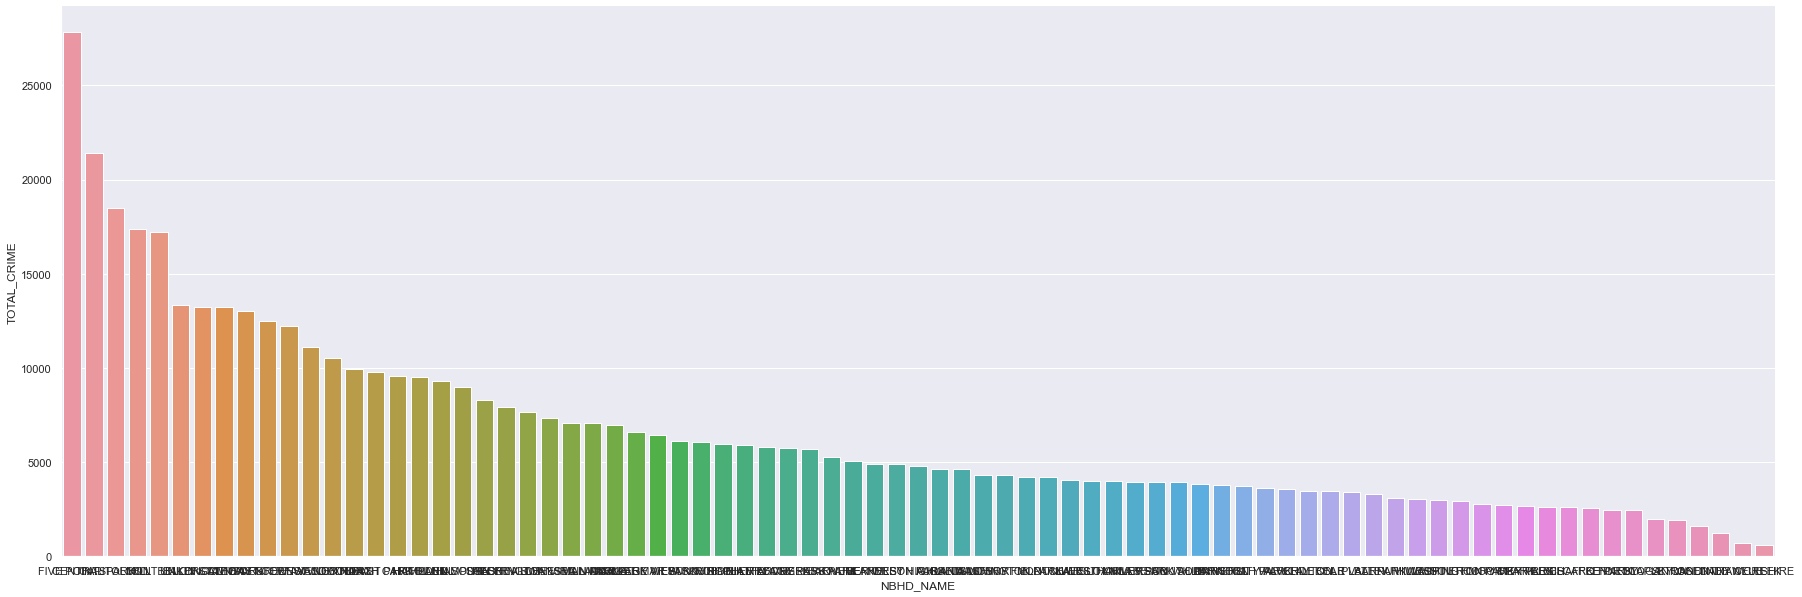

In [44]:
# setting the dimensions of the plot
sns.set(rc={'figure.figsize':(11.7,100)})

# plotting
sns.catplot(x="NBHD_NAME", y="TOTAL_CRIME", kind="bar", height=8.27, aspect=25/8.27, data=crime2)
plt.show()

I have a problem here with overlap. There are too many neighborhoods. I will subset the data to top 10 highest.

In [45]:
top10_highest = crime2.iloc[0:10]
top10_highest.head()

,NBHD_NAME,TOTAL_CRIME
0,FIVE POINTS,27806
1,CENTRAL PARK,21392
2,CAPITOL HILL,18472
3,CBD,17369
4,MONTBELLO,17241


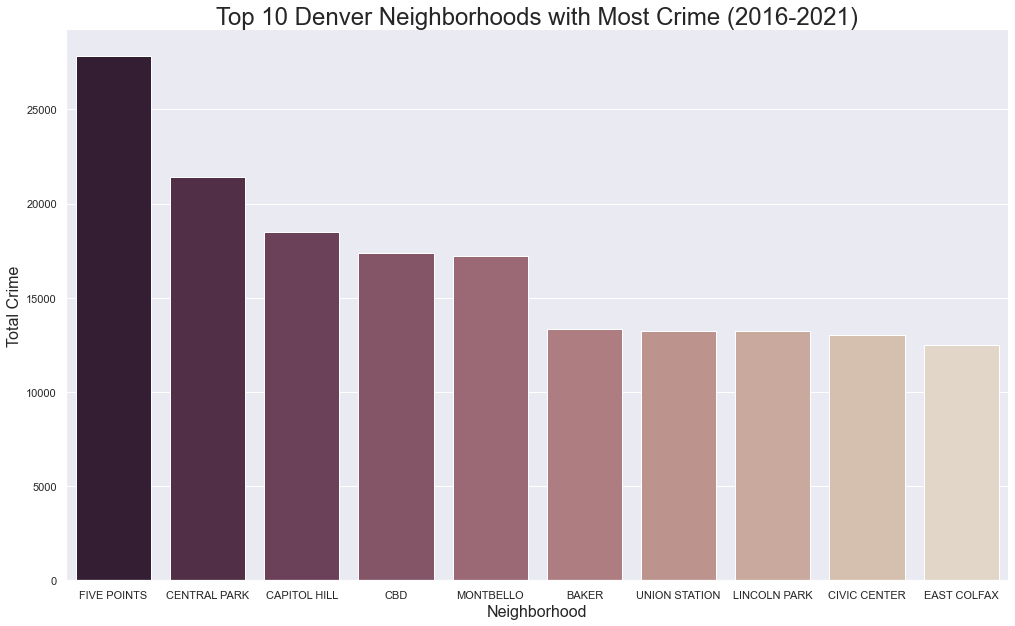

In [46]:
# setting the dimensions of the plot
# sns.set(rc={'figure.figsize':(20,50)})

# plotting
sns.catplot(x="NBHD_NAME", y="TOTAL_CRIME", kind="bar", palette="ch:.25_r", height=8.27, aspect=14/8.27, data=top10_highest)
plt.xlabel("Neighborhood", size=16)
plt.ylabel("Total Crime", size=16)
plt.title("Top 10 Denver Neighborhoods with Most Crime (2016-2021)", size=24)
plt.show()

Next I will see how crime is changing year over year for these neighborhoods.

In [47]:
yearly_crime.head(20)

,NBHD_NAME,2016,2017,2018,2019,2020,2021
0,five points,5019,5172,4588,5155,4491,3315
1,cbd,3336,3126,2881,3365,2615,2000
2,montbello,3138,3071,3304,3056,2698,1927
3,capitol hill,2942,3323,3453,3174,3428,2111
4,lincoln park,2567,2319,2503,2236,2087,1476
5,east colfax,2526,2717,2386,1732,1802,1303
6,baker,2476,2527,2381,2283,2072,1552
7,westwood,2272,2171,2015,1777,1645,1206
8,civic center,2126,2378,2666,2497,2045,1288
9,union station,2116,2237,2096,2764,2169,1808


In [48]:
yearly_crime_top10 = yearly_crime.loc[[0, 11, 3, 1, 2, 6, 9, 4, 8, 5]]
yearly_crime_top10['NBHD_NAME'] = yearly_crime_top10['NBHD_NAME'].str.upper() # all caps 
yearly_crime_top10

,NBHD_NAME,2016,2017,2018,2019,2020,2021
0,FIVE POINTS,5019,5172,4588,5155,4491,3315
11,CENTRAL PARK,1835,3726,4264,4474,3865,3176
3,CAPITOL HILL,2942,3323,3453,3174,3428,2111
1,CBD,3336,3126,2881,3365,2615,2000
2,MONTBELLO,3138,3071,3304,3056,2698,1927
6,BAKER,2476,2527,2381,2283,2072,1552
9,UNION STATION,2116,2237,2096,2764,2169,1808
4,LINCOLN PARK,2567,2319,2503,2236,2087,1476
8,CIVIC CENTER,2126,2378,2666,2497,2045,1288
5,EAST COLFAX,2526,2717,2386,1732,1802,1303


In [49]:
# melting the table into a long format in order to plot

yearly_crime_top10_long = pd.melt(yearly_crime_top10, id_vars = ['NBHD_NAME'], var_name='YEAR', value_name='COUNT') 
yearly_crime_top10_long.head()

,NBHD_NAME,YEAR,COUNT
0,FIVE POINTS,2016,5019
1,CENTRAL PARK,2016,1835
2,CAPITOL HILL,2016,2942
3,CBD,2016,3336
4,MONTBELLO,2016,3138


In [50]:
top10_yearly_counts = yearly_crime_top10_long.groupby(['YEAR','NBHD_NAME','COUNT']).count()
top10_yearly_counts.head()

Empty DataFrame
Columns: []
Index: [(2016, BAKER, 2476), (2016, CAPITOL HILL, 2942), (2016, CBD, 3336), (2016, CENTRAL PARK, 1835), (2016, CIVIC CENTER, 2126)]

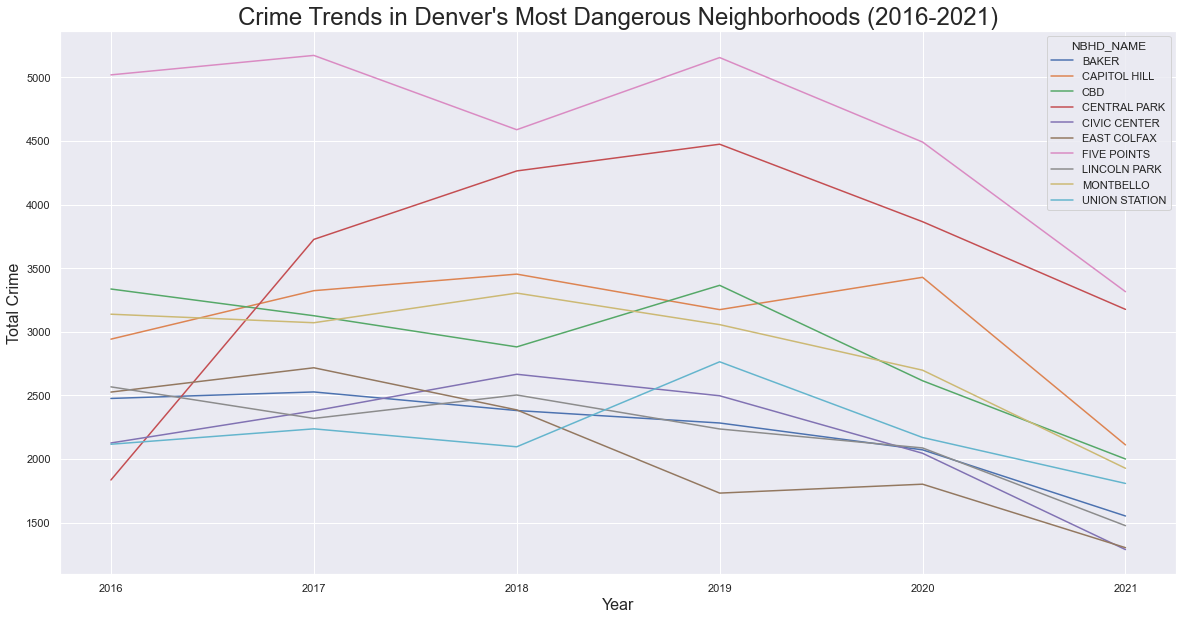

In [51]:
sns.set(rc={"figure.figsize":(20, 10)}) # width=20, #height=10

sns.lineplot(data=top10_yearly_counts, x="YEAR", y="COUNT", hue='NBHD_NAME')

plt.xlabel("Year", size=16)
plt.ylabel("Total Crime", size=16)
plt.title("Crime Trends in Denver's Most Dangerous Neighborhoods (2016-2021)", size=24)

plt.show()

This plot shows crime is trending downward over time for the neighborhoods that traditionally have the most crime in Denver. Crime remains very high in Five Points and Central Park relative to the other neighborhoods.

Now let's throw on all the neighborhoods to see if any one stands out.

In [52]:
# melting yearly crime
yearly_crime_all_long = pd.melt(yearly_crime, id_vars = ['NBHD_NAME'], var_name='YEAR', value_name='COUNT') 
yearly_crime_all_long.head()

,NBHD_NAME,YEAR,COUNT
0,five points,2016,5019
1,cbd,2016,3336
2,montbello,2016,3138
3,capitol hill,2016,2942
4,lincoln park,2016,2567


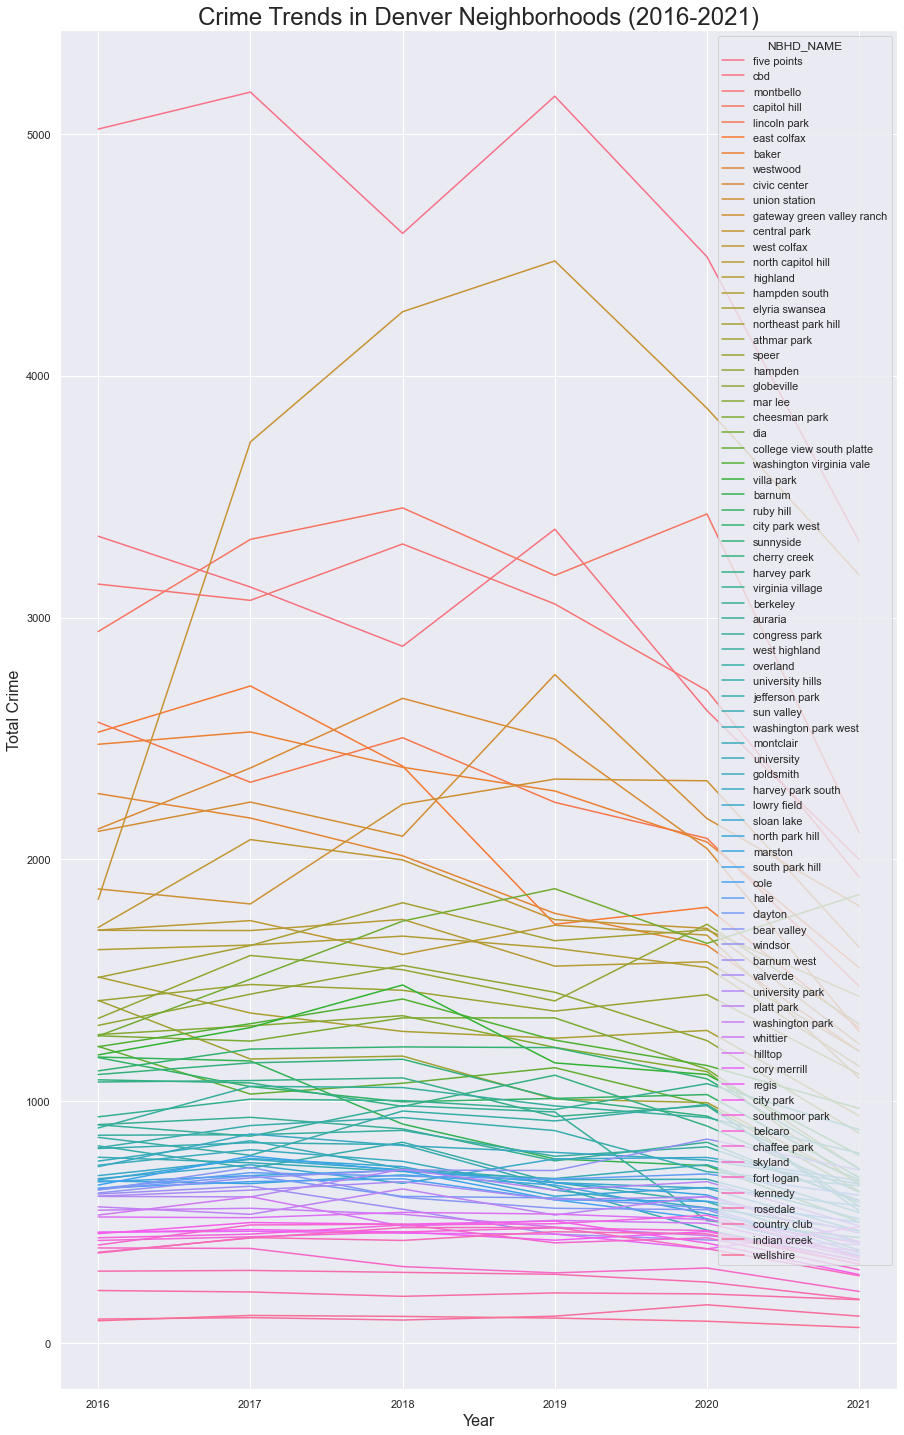

In [53]:
sns.set(rc={"figure.figsize":(15, 25)}) # width=5, #height=10

sns.lineplot(data=yearly_crime_all_long, x="YEAR", y="COUNT", hue='NBHD_NAME')

plt.xlabel("Year", size=16)
plt.ylabel("Total Crime", size=16)
plt.title("Crime Trends in Denver Neighborhoods (2016-2021)", size=24)

plt.show()

The top two plots really catch my eye but it is hard to tell which neighborhood they correspond to. I can see in 2021 they had the first and second highest total crime. I'll do a quick query. 

In [54]:
yearly_crime[['NBHD_NAME','2021']]

,NBHD_NAME,2021
0,five points,3315
1,cbd,2000
2,montbello,1927
3,capitol hill,2111
4,lincoln park,1476
...,...,...
73,kennedy,327
74,rosedale,182
75,country club,180
76,indian creek,112


Five Points and CBD (Central Business District). These neighborhoods have major crime issues although crime appears to have peaked for both neighborhoods in 2019. Most alarming is the rate of crime increase in the CBD between 2016 and 2017. What happened?

Lastly, let's look at all crime types for all neighborhoods and their totals.

In [55]:
all_crimes_all_nbhds = crime.groupby(['NEIGHBORHOOD_ID', 'OFFENSE_CATEGORY_ID']).agg({'OFFENSE_CATEGORY_ID': 'count'
                                              })
all_crimes_all_nbhds

OFFENSE_CATEGORY_ID
NEIGHBORHOOD_ID OFFENSE_CATEGORY_ID                          
athmar-park     aggravated-assault                        204
                all-other-crimes                         1490
                arson                                      11
                auto-theft                                540
                burglary                                  294
...                                                       ...
windsor         robbery                                    50
                sexual-assault                             54
                theft-from-motor-vehicle                  671
                traffic-accident                          875
                white-collar-crime                        129

[1167 rows x 1 columns]

I can now look up each neighborhood'(s) crime like this...

In [56]:
all_crimes_all_nbhds.loc[['sunnyside', 'chaffee-park']]

OFFENSE_CATEGORY_ID
NEIGHBORHOOD_ID OFFENSE_CATEGORY_ID                              
sunnyside       aggravated-assault                            167
                all-other-crimes                              963
                arson                                           8
                auto-theft                                    565
                burglary                                      382
                drug-alcohol                                  222
                larceny                                       486
                murder                                          4
                other-crimes-against-persons                  288
                public-disorder                               762
                robbery                                        92
                sexual-assault                                 42
                theft-from-motor-vehicle                      635
                traffic-accident                             1387
                white-collar-crime                             76
chaffee-park    aggravated-assault                             66
                all-other-crimes                              430
                arson                                           5
                auto-theft                                    268
                burglary                                      123
                drug-alcohol                                  172
                larceny                                       231
                murder                                          1
                other-crimes-against-persons                  113
                public-disorder                               256
                robbery                                        63
                sexual-assault                                 15
                theft-from-motor-vehicle                      272
                traffic-accident                              494
                white-collar-crime                             36

Next onto the ACS Survey. The goal is to parse that down to attributes of interest and merge with the crime.

In [57]:
acs = pd.read_csv("C:/Users/john_/Documents/acs.csv")  # 5-year American Community Survey

In [58]:
display(list(acs.columns.values))

['NBHD_NAME',
 'TTL_POPULATION_ALL',
 'HISPANIC_OR_LATINO',
 'WHITE',
 'BLACK',
 'NATIVE_AMERICAN',
 'ASIAN',
 'HAWAIIAN_PI',
 'OTHER_RACE',
 'TWO_OR_MORE',
 'PCT_HISPANIC',
 'PCT_WHITE',
 'PCT_BLACK',
 'PCT_NATIVEAM',
 'PCT_ASIAN',
 'PCT_HAWAIIANPI',
 'PCT_OTHERRACE',
 'PCT_TWOORMORE_RACES',
 'MALE',
 'FEMALE',
 'AGE_LESS_5',
 'AGE_5_TO_9',
 'AGE_10_TO_14',
 'AGE_15_TO_17',
 'AGE_0_TO_9',
 'AGE_10_TO_19',
 'AGE_20_TO_29',
 'AGE_30_TO_39',
 'AGE_40_TO_49',
 'AGE_50_TO_59',
 'AGE_60_TO_69',
 'AGE_70_TO_79',
 'AGE_80_PLUS',
 'AGELESS18',
 'AGE65PLUS',
 'PCT_AGELESS18',
 'PCT_AGE65PLUS',
 'MEDIAN_AGE_ALL',
 'MEDIAN_AGE_MALE',
 'MEDIAN_AGE_FEMALE',
 'TTL_AGE_3_PLUS_ENRSTATUS',
 'ENROLLED_IN_SCHOOL',
 'NURSERY_OR_PRESCHOOL',
 'KINDERGARTEN',
 'GRADES_5_TO_8',
 'GRADES_9_TO_12',
 'COLLEGE_UNDERGRADUATE',
 'GRADUATE_SCHOOL',
 'NOT_ENROLLED',
 'TOTAL_COMMUTERS',
 'COMMUTE_LESS_15',
 'COMMUTE_15_TO_30',
 'COMMUTE_30_TO_45',
 'COMMUTE_45_TO_60',
 'COMMUTE_60_PLUS',
 'TTLPOP_25PLUS_EDU',
 'LESS_T

In [59]:
acs['NBHD_NAME']= acs['NBHD_NAME'].str.upper()
acs

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,WESTERN_AFRICA_FB,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY
0,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,0.0,0.0,729.0,729.0,0.0,697.0,32.0,0.0,10.30,9.00
1,SUNNYSIDE,9832.0,4910.0,4225.0,276.0,172.0,129.0,28.0,2.0,90.0,...,10.0,0.0,901.0,901.0,7.0,873.0,21.0,0.0,20.60,17.63
2,HIGHLAND,8991.0,2444.0,5890.0,331.0,29.0,213.0,0.0,0.0,84.0,...,0.0,8.0,690.0,650.0,0.0,606.0,44.0,40.0,14.95,12.80
3,GLOBEVILLE,3551.0,2178.0,1159.0,116.0,12.0,0.0,15.0,6.0,65.0,...,0.0,21.0,705.0,705.0,13.0,680.0,12.0,0.0,34.60,25.30
4,JEFFERSON PARK,2827.0,1454.0,1114.0,138.0,51.0,35.0,0.0,0.0,35.0,...,9.0,0.0,884.0,884.0,0.0,879.0,5.0,0.0,27.60,24.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,VILLA PARK,9135.0,6611.0,2194.0,185.0,44.0,54.0,0.0,0.0,47.0,...,0.0,0.0,2366.0,2366.0,7.0,2359.0,0.0,0.0,30.40,25.15
74,CLAYTON,4250.0,1804.0,1215.0,1107.0,40.0,26.0,0.0,7.0,51.0,...,0.0,0.0,864.0,858.0,11.0,847.0,0.0,6.0,24.80,23.10
75,GATEWAY - GREEN VALLEY RANCH,34957.0,14363.0,7935.0,9482.0,183.0,1712.0,15.0,346.0,921.0,...,284.0,7.0,6355.0,6355.0,389.0,5411.0,555.0,0.0,7.80,6.55
76,INDIAN CREEK,3512.0,506.0,2262.0,505.0,19.0,76.0,0.0,0.0,144.0,...,0.0,0.0,248.0,248.0,9.0,157.0,82.0,0.0,7.40,4.00


In [60]:
acs['NBHD_NAME']= acs['NBHD_NAME'].str.replace('-',' ')

In [61]:
acs['NBHD_NAME']= acs['NBHD_NAME'].str.replace('  ',' ') #getting rid of some double spaces

In [62]:
# cleaning up itemized crime some more to prep for merge

itemized_crime.rename(columns = {'NEIGHBORHOOD_ID':'NBHD_NAME'}, inplace = True) # renaming col name first
itemized_crime['NBHD_NAME']= itemized_crime['NBHD_NAME'].str.replace('-',' ') # removing the hyphens
itemized_crime['NBHD_NAME'] = itemized_crime['NBHD_NAME'].str.upper() # all caps 

In [63]:
acs_crime_merged = pd.merge(acs, itemized_crime, on='NBHD_NAME', how='outer') # all crime types
acs_crime_merged

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY,OFFENSE_CATEGORY_ID,COUNT
0,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,729.0,729.0,0.0,697.0,32.0,0.0,10.3,9.0,aggravated-assault,66.0
1,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,729.0,729.0,0.0,697.0,32.0,0.0,10.3,9.0,all-other-crimes,430.0
2,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,729.0,729.0,0.0,697.0,32.0,0.0,10.3,9.0,arson,5.0
3,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,729.0,729.0,0.0,697.0,32.0,0.0,10.3,9.0,auto-theft,268.0
4,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,729.0,729.0,0.0,697.0,32.0,0.0,10.3,9.0,burglary,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,GATEWAY GREEN VALLEY RANCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,robbery,194.0
1166,GATEWAY GREEN VALLEY RANCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sexual-assault,149.0
1167,GATEWAY GREEN VALLEY RANCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,theft-from-motor-vehicle,1420.0
1168,GATEWAY GREEN VALLEY RANCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,traffic-accident,2595.0


This isn't right. Look at all the NA's. Let me just look at total crime per neighborhood calling the crime2 df...

In [64]:
acs_crime_merged2 = pd.merge(acs, crime2, on='NBHD_NAME', how='outer') # just total crime
acs_crime_merged2

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY,TOTAL_CRIME
0,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,0.0,729.0,729.0,0.0,697.0,32.0,0.0,10.30,9.00,2545.0
1,SUNNYSIDE,9832.0,4910.0,4225.0,276.0,172.0,129.0,28.0,2.0,90.0,...,0.0,901.0,901.0,7.0,873.0,21.0,0.0,20.60,17.63,6079.0
2,HIGHLAND,8991.0,2444.0,5890.0,331.0,29.0,213.0,0.0,0.0,84.0,...,8.0,690.0,650.0,0.0,606.0,44.0,40.0,14.95,12.80,9527.0
3,GLOBEVILLE,3551.0,2178.0,1159.0,116.0,12.0,0.0,15.0,6.0,65.0,...,21.0,705.0,705.0,13.0,680.0,12.0,0.0,34.60,25.30,7907.0
4,JEFFERSON PARK,2827.0,1454.0,1114.0,138.0,51.0,35.0,0.0,0.0,35.0,...,0.0,884.0,884.0,0.0,879.0,5.0,0.0,27.60,24.20,4888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,FIVE POINTS,14768.0,3090.0,9534.0,1472.0,63.0,233.0,19.0,0.0,357.0,...,27.0,855.0,814.0,15.0,733.0,66.0,41.0,23.57,18.87,27806.0
78,CENTRAL PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21392.0
79,GATEWAY GREEN VALLEY RANCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12246.0
80,COLLEGE VIEW SOUTH PLATTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6097.0


It appears the ACS df neighborhood names do not match he crime df neighborhood names. Let's check...

In [65]:
a = acs['NBHD_NAME'].sort_values()
a.count()

78

In [66]:
b = crime2['NBHD_NAME'].sort_values() # has more neighborhoods than acs
b.count()

79

In [67]:
list(zip(a,b))

[('ATHMAR PARK', 'ATHMAR PARK'),
 ('AURARIA', 'AURARIA'),
 ('BAKER', 'BAKER'),
 ('BARNUM', 'BARNUM'),
 ('BARNUM WEST', 'BARNUM WEST'),
 ('BEAR VALLEY', 'BEAR VALLEY'),
 ('BELCARO', 'BELCARO'),
 ('BERKELEY', 'BERKELEY'),
 ('CAPITOL HILL', 'CAPITOL HILL'),
 ('CBD', 'CBD'),
 ('CHAFFEE PARK', 'CENTRAL PARK'),
 ('CHEESMAN PARK', 'CHAFFEE PARK'),
 ('CHERRY CREEK', 'CHEESMAN PARK'),
 ('CITY PARK', 'CHERRY CREEK'),
 ('CITY PARK WEST', 'CITY PARK'),
 ('CIVIC CENTER', 'CITY PARK WEST'),
 ('CLAYTON', 'CIVIC CENTER'),
 ('COLE', 'CLAYTON'),
 ('COLLEGE VIEW  SOUTH PLATTE', 'COLE'),
 ('CONGRESS PARK', 'COLLEGE VIEW SOUTH PLATTE'),
 ('CORY  MERRILL', 'CONGRESS PARK'),
 ('COUNTRY CLUB', 'CORY MERRILL'),
 ('DIA', 'COUNTRY CLUB'),
 ('EAST COLFAX', 'DIA'),
 ('ELYRIA SWANSEA', 'EAST COLFAX'),
 ('FIVE POINTS', 'ELYRIA SWANSEA'),
 ('FORT LOGAN', 'FIVE POINTS'),
 ('GATEWAY  GREEN VALLEY RANCH', 'FORT LOGAN'),
 ('GLOBEVILLE', 'GATEWAY GREEN VALLEY RANCH'),
 ('GOLDSMITH', 'GLOBEVILLE'),
 ('HALE', 'GOLDSMITH'),


I'll indentify the disparity below...

In [68]:
crime3 = crime2.copy() # make a copy before I start deleting rows

In [69]:
a = set(acs['NBHD_NAME'])
b = set(crime3['NBHD_NAME'])

diff = (a-b).union(b-a)
print('Differences between the two lists: ')
print(diff)

Differences between the two lists: 
{'GATEWAY  GREEN VALLEY RANCH', 'GATEWAY GREEN VALLEY RANCH', 'CENTRAL PARK', 'COLLEGE VIEW  SOUTH PLATTE', 'CORY  MERRILL', 'COLLEGE VIEW SOUTH PLATTE', 'CORY MERRILL'}


I'll clean up my spacing in the next step but it looks like the only difference is Central Park. This sounds right. Stapleton was recently renamed Central Park.

In [70]:
# not sure if I should drop Stapleton or not, but if I did...

# to_drop = crime3[(crime3['NBHD_NAME'] == 'CENTRAL PARK')].index #dropping Central Park from df

In [71]:
# crime3.drop(to_drop, inplace = True)
# crime3

In [72]:
crime3['NBHD_NAME']= crime3['NBHD_NAME'].str.replace('  ',' ') # removing the double spaces from crime3
acs['NBHD_NAME']= acs['NBHD_NAME'].str.replace('  ',' ') # removing the double spaces from acs


What I could do is rename Stapleton to Central Park in acs and combine (add) Stapleton and Central Park in crime3.

In [73]:
crime3[(crime3['NBHD_NAME'] == 'CENTRAL PARK')] # crime3 has Stapleton

,NBHD_NAME,TOTAL_CRIME
1,CENTRAL PARK,21392


In [74]:
crime3[(crime3['NBHD_NAME'] == 'STAPLETON')] # crime3 also has Central Park (Stapleton's new name)

,NBHD_NAME,TOTAL_CRIME
73,STAPLETON,1954


In [75]:
acs[(acs['NBHD_NAME'] == 'CENTRAL PARK')] # acs does not have Central Park...

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,WESTERN_AFRICA_FB,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY


In [76]:
acs[(acs['NBHD_NAME'] == 'STAPLETON')] # acs just has Stapleton

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,WESTERN_AFRICA_FB,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY
56,STAPLETON,17626.0,2099.0,12569.0,1395.0,96.0,679.0,0.0,2.0,786.0,...,19.0,9.0,297.0,257.0,38.0,219.0,0.0,40.0,4.05,2.65


In [77]:
add = crime3['TOTAL_CRIME'].iloc[1] + crime3['TOTAL_CRIME'].iloc[73] # summing up crime

In [78]:
crime3

,NBHD_NAME,TOTAL_CRIME
0,FIVE POINTS,27806
1,CENTRAL PARK,21392
2,CAPITOL HILL,18472
3,CBD,17369
4,MONTBELLO,17241
...,...,...
74,SKYLAND,1924
75,ROSEDALE,1615
76,COUNTRY CLUB,1223
77,INDIAN CREEK,687


First let's rename Central Park to Stapleton in acs so we don't lose demographic info.

In [79]:
acs_nostapleton = acs.replace(to_replace ="STAPLETON", value ="CENTRAL PARK")
acs_nostapleton

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,WESTERN_AFRICA_FB,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY
0,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,0.0,0.0,729.0,729.0,0.0,697.0,32.0,0.0,10.30,9.00
1,SUNNYSIDE,9832.0,4910.0,4225.0,276.0,172.0,129.0,28.0,2.0,90.0,...,10.0,0.0,901.0,901.0,7.0,873.0,21.0,0.0,20.60,17.63
2,HIGHLAND,8991.0,2444.0,5890.0,331.0,29.0,213.0,0.0,0.0,84.0,...,0.0,8.0,690.0,650.0,0.0,606.0,44.0,40.0,14.95,12.80
3,GLOBEVILLE,3551.0,2178.0,1159.0,116.0,12.0,0.0,15.0,6.0,65.0,...,0.0,21.0,705.0,705.0,13.0,680.0,12.0,0.0,34.60,25.30
4,JEFFERSON PARK,2827.0,1454.0,1114.0,138.0,51.0,35.0,0.0,0.0,35.0,...,9.0,0.0,884.0,884.0,0.0,879.0,5.0,0.0,27.60,24.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,VILLA PARK,9135.0,6611.0,2194.0,185.0,44.0,54.0,0.0,0.0,47.0,...,0.0,0.0,2366.0,2366.0,7.0,2359.0,0.0,0.0,30.40,25.15
74,CLAYTON,4250.0,1804.0,1215.0,1107.0,40.0,26.0,0.0,7.0,51.0,...,0.0,0.0,864.0,858.0,11.0,847.0,0.0,6.0,24.80,23.10
75,GATEWAY GREEN VALLEY RANCH,34957.0,14363.0,7935.0,9482.0,183.0,1712.0,15.0,346.0,921.0,...,284.0,7.0,6355.0,6355.0,389.0,5411.0,555.0,0.0,7.80,6.55
76,INDIAN CREEK,3512.0,506.0,2262.0,505.0,19.0,76.0,0.0,0.0,144.0,...,0.0,0.0,248.0,248.0,9.0,157.0,82.0,0.0,7.40,4.00


In [80]:
acs_nostapleton['NBHD_NAME'].unique()

array(['CHAFFEE PARK', 'SUNNYSIDE', 'HIGHLAND', 'GLOBEVILLE',
       'JEFFERSON PARK', 'SUN VALLEY', 'VALVERDE', 'ATHMAR PARK',
       'NORTHEAST PARK HILL', 'ELYRIA SWANSEA', 'WELLSHIRE', 'UNIVERSITY',
       'ROSEDALE', 'CHEESMAN PARK', 'HILLTOP', 'MONTCLAIR', 'HALE',
       'NORTH PARK HILL', 'SOUTH PARK HILL', 'VIRGINIA VILLAGE', 'DIA',
       'UNIVERSITY HILLS', 'HARVEY PARK', 'MAR LEE', 'WESTWOOD',
       'EAST COLFAX', 'AURARIA', 'UNIVERSITY PARK', 'PLATT PARK',
       'COLLEGE VIEW SOUTH PLATTE', 'OVERLAND', 'RUBY HILL', 'KENNEDY',
       'HAMPDEN', 'BAKER', 'FORT LOGAN', 'BEAR VALLEY',
       'HARVEY PARK SOUTH', 'SOUTHMOOR PARK', 'HAMPDEN SOUTH',
       'GOLDSMITH', 'CORY MERRILL', 'WINDSOR', 'BELCARO',
       'WASHINGTON PARK', 'WASHINGTON PARK WEST', 'SPEER', 'CHERRY CREEK',
       'COUNTRY CLUB', 'CONGRESS PARK', 'CITY PARK', 'CAPITOL HILL',
       'NORTH CAPITOL HILL', 'CIVIC CENTER', 'CBD', 'UNION STATION',
       'CENTRAL PARK', 'MONTBELLO', 'LOWRY FIELD', 'WEST COLFAX'

In [81]:
crime3 = crime3.drop([crime3.index[1], crime3.index[73]]) # dropping Central Park and Stapleton from crime3

In [82]:
crime3.loc[len(crime3.index)] = ['CENTRAL PARK', add ] # adding the new Central Park back with the combined number of crimes
crime3

,NBHD_NAME,TOTAL_CRIME
0,FIVE POINTS,27806
2,CAPITOL HILL,18472
3,CBD,17369
4,MONTBELLO,17241
5,BAKER,13322
...,...,...
74,SKYLAND,1924
75,ROSEDALE,1615
76,COUNTRY CLUB,1223
77,CENTRAL PARK,23346


Now to merge...

In [83]:
acs_crime_merged3 = pd.merge(acs_nostapleton, crime3, on='NBHD_NAME', how='outer') # just total crime
acs_crime_merged3

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY,TOTAL_CRIME
0,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,0.0,729.0,729.0,0.0,697.0,32.0,0.0,10.30,9.00,2545.0
1,SUNNYSIDE,9832.0,4910.0,4225.0,276.0,172.0,129.0,28.0,2.0,90.0,...,0.0,901.0,901.0,7.0,873.0,21.0,0.0,20.60,17.63,6079.0
2,HIGHLAND,8991.0,2444.0,5890.0,331.0,29.0,213.0,0.0,0.0,84.0,...,8.0,690.0,650.0,0.0,606.0,44.0,40.0,14.95,12.80,9527.0
3,GLOBEVILLE,3551.0,2178.0,1159.0,116.0,12.0,0.0,15.0,6.0,65.0,...,21.0,705.0,705.0,13.0,680.0,12.0,0.0,34.60,25.30,7907.0
4,JEFFERSON PARK,2827.0,1454.0,1114.0,138.0,51.0,35.0,0.0,0.0,35.0,...,0.0,884.0,884.0,0.0,879.0,5.0,0.0,27.60,24.20,4888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,VILLA PARK,9135.0,6611.0,2194.0,185.0,44.0,54.0,0.0,0.0,47.0,...,0.0,2366.0,2366.0,7.0,2359.0,0.0,0.0,30.40,25.15,7051.0
74,CLAYTON,4250.0,1804.0,1215.0,1107.0,40.0,26.0,0.0,7.0,51.0,...,0.0,864.0,858.0,11.0,847.0,0.0,6.0,24.80,23.10,3478.0
75,GATEWAY GREEN VALLEY RANCH,34957.0,14363.0,7935.0,9482.0,183.0,1712.0,15.0,346.0,921.0,...,7.0,6355.0,6355.0,389.0,5411.0,555.0,0.0,7.80,6.55,12246.0
76,INDIAN CREEK,3512.0,506.0,2262.0,505.0,19.0,76.0,0.0,0.0,144.0,...,0.0,248.0,248.0,9.0,157.0,82.0,0.0,7.40,4.00,NaN


Let's double check everything looks fine...

In [84]:
acs_crime_merged3[(acs_crime_merged3['NBHD_NAME'] == 'CENTRAL PARK')]

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY,TOTAL_CRIME
56,CENTRAL PARK,17626.0,2099.0,12569.0,1395.0,96.0,679.0,0.0,2.0,786.0,...,9.0,297.0,257.0,38.0,219.0,0.0,40.0,4.05,2.65,23346.0


Not sure why I have two CENTRAL PARKS. I'll drop one.

In [85]:
acs_crime_merged3 = acs_crime_merged3.drop([acs_crime_merged3.index[56]])
acs_crime_merged3

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY,TOTAL_CRIME
0,CHAFFEE PARK,4045.0,2343.0,1506.0,59.0,0.0,29.0,0.0,0.0,108.0,...,0.0,729.0,729.0,0.0,697.0,32.0,0.0,10.30,9.00,2545.0
1,SUNNYSIDE,9832.0,4910.0,4225.0,276.0,172.0,129.0,28.0,2.0,90.0,...,0.0,901.0,901.0,7.0,873.0,21.0,0.0,20.60,17.63,6079.0
2,HIGHLAND,8991.0,2444.0,5890.0,331.0,29.0,213.0,0.0,0.0,84.0,...,8.0,690.0,650.0,0.0,606.0,44.0,40.0,14.95,12.80,9527.0
3,GLOBEVILLE,3551.0,2178.0,1159.0,116.0,12.0,0.0,15.0,6.0,65.0,...,21.0,705.0,705.0,13.0,680.0,12.0,0.0,34.60,25.30,7907.0
4,JEFFERSON PARK,2827.0,1454.0,1114.0,138.0,51.0,35.0,0.0,0.0,35.0,...,0.0,884.0,884.0,0.0,879.0,5.0,0.0,27.60,24.20,4888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,VILLA PARK,9135.0,6611.0,2194.0,185.0,44.0,54.0,0.0,0.0,47.0,...,0.0,2366.0,2366.0,7.0,2359.0,0.0,0.0,30.40,25.15,7051.0
74,CLAYTON,4250.0,1804.0,1215.0,1107.0,40.0,26.0,0.0,7.0,51.0,...,0.0,864.0,858.0,11.0,847.0,0.0,6.0,24.80,23.10,3478.0
75,GATEWAY GREEN VALLEY RANCH,34957.0,14363.0,7935.0,9482.0,183.0,1712.0,15.0,346.0,921.0,...,7.0,6355.0,6355.0,389.0,5411.0,555.0,0.0,7.80,6.55,12246.0
76,INDIAN CREEK,3512.0,506.0,2262.0,505.0,19.0,76.0,0.0,0.0,144.0,...,0.0,248.0,248.0,9.0,157.0,82.0,0.0,7.40,4.00,NaN


Again...

In [86]:
acs_crime_merged3[(acs_crime_merged3['NBHD_NAME'] == 'CENTRAL PARK')]

,NBHD_NAME,TTL_POPULATION_ALL,HISPANIC_OR_LATINO,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,HAWAIIAN_PI,OTHER_RACE,TWO_OR_MORE,...,OCEANIA_FB,AMERICAS_FB,LATIN_AMERICA_FB,CARRIBEAN_FB,CENTRAL_AMERICA_FB,SOUTH_AMERICA_FB,NORTH_AMERICA_FB,PCT_POVERTY,PCT_FAM_POVERTY,TOTAL_CRIME


Good. Just 1. acs is now sucessfully merged with crime in acs_crime_merged3

I have 184 attributes in acs_crime_merged3 for each neighborhood. That's a lot! In the interest of processing constraints, and garbage in, garbage out, I will select a subset of variables that I think might have some relationship to crime.

In [87]:
totalcrime_plus_someattributes = acs_crime_merged3.loc[:, ['NBHD_NAME', 'TOTAL_CRIME',
 'TTL_POPULATION_ALL','PCT_HISPANIC',
 'PCT_WHITE',
 'PCT_BLACK','MEDIAN_AGE_ALL',
 'MEDIAN_AGE_FEMALE',
 'MEDIAN_AGE_MALE',
 'OWNER_OCCUPIED_HU',
 'RENTER_OCCUPIED_HU',
 'TTL_HOUSEHOLDS','MALE_HHLDR_NO_WIFE_PRESENT',
 'FEMALE_HHLDR_NO_HSBND_PRESENT',
 'NONFAMILY_HOUSEHOLD', 'MED_GROSS_RENT',
 'MEDIAN_HOME_VALUE', 'PCT_POVERTY', 'MED_HH_INCOME',
 'MED_FAMILY_INCOME',
 'PER_CAPITA_INCOME', 'ENROLLED_IN_SCHOOL','LESS_THAN_HS_DIPLOMA_EDU',
 'HSGRAD_OR_EQUIV_EDU',
 'SOMECOLLEGE_OR_AA_EDU',
 'BACHELORS_OR_HIGHER_EDU', 'SPANISH_LNG']]
totalcrime_plus_someattributes

,NBHD_NAME,TOTAL_CRIME,TTL_POPULATION_ALL,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,MEDIAN_AGE_ALL,MEDIAN_AGE_FEMALE,MEDIAN_AGE_MALE,OWNER_OCCUPIED_HU,...,PCT_POVERTY,MED_HH_INCOME,MED_FAMILY_INCOME,PER_CAPITA_INCOME,ENROLLED_IN_SCHOOL,LESS_THAN_HS_DIPLOMA_EDU,HSGRAD_OR_EQUIV_EDU,SOMECOLLEGE_OR_AA_EDU,BACHELORS_OR_HIGHER_EDU,SPANISH_LNG
0,CHAFFEE PARK,2545.0,4045.0,57.92,37.23,1.46,36.20,38.10,32.80,1128.0,...,10.30,47969.00,61932.00,19447.42,801.0,715.0,738.0,741.0,723.0,1361.0
1,SUNNYSIDE,6079.0,9832.0,50.50,42.24,3.03,34.53,35.53,33.77,2282.0,...,20.60,49574.67,50689.33,20623.15,2108.0,1549.0,1714.0,1487.0,2463.0,2302.0
2,HIGHLAND,9527.0,8991.0,28.21,64.09,3.92,32.85,31.85,33.50,2132.0,...,14.95,67760.50,95394.50,26129.55,1672.0,760.0,742.0,1283.0,4132.0,1426.0
3,GLOBEVILLE,7907.0,3551.0,61.33,32.64,3.27,30.30,30.40,30.20,387.0,...,34.60,29639.00,46023.00,14350.97,1092.0,636.0,692.0,459.0,374.0,1366.0
4,JEFFERSON PARK,4888.0,2827.0,51.43,39.41,4.88,31.50,31.80,30.90,412.0,...,27.60,40819.00,46250.00,15539.62,524.0,726.0,265.0,296.0,774.0,1260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,VILLA PARK,7051.0,9135.0,72.43,24.21,1.88,30.20,30.70,30.90,1236.0,...,30.40,33139.50,39487.00,14009.60,2418.0,2041.0,1494.0,1204.0,776.0,4099.0
74,CLAYTON,3478.0,4250.0,42.45,28.59,26.05,32.90,32.70,33.30,845.0,...,24.80,39130.00,35819.00,15979.27,1060.0,860.0,607.0,589.0,693.0,1649.0
75,GATEWAY GREEN VALLEY RANCH,12246.0,34957.0,41.38,22.87,27.10,31.50,30.63,32.10,7127.0,...,7.80,68863.50,69421.25,0.00,11831.0,4193.0,5310.0,7079.0,4510.0,10548.0
76,INDIAN CREEK,NaN,3512.0,14.41,64.41,14.38,39.70,42.80,37.70,1305.0,...,7.40,56940.00,55658.00,37005.50,585.0,116.0,404.0,715.0,1646.0,377.0


In [88]:
# corrM = acs.corr()
# corrM

In [89]:
# Heatmap
# sn.heatmap(corrM, annot=True)
# plt.show()

Next I will tally up liquor stores by neighborhood as another attribute.

In [90]:
liquor = pd.read_csv("C:/Users/john_/Documents/liquor.csv") 

In [91]:
liquor.head()

,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,ADDRESS_ID,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,NEIGHBORHOOD,ZONE_DISTRICT,X_COORD,Y_COORD
0,2012-BFN-1062925,BAR RED,437 W COLFAX AVE,LIQUOR - TAVERN AND CABARET,LICENSE ISSUED - ACTIVE,2021-06-15 00:00:00,2022-01-29 00:00:00,182208.0,437 W Colfax Ave,None,Denver,CO,80204,9,6,01702,CBD,D-C,3142260.0,1694903.0
1,2001-BFN-57494,SAFEWAY STORE #1463,2150 S DOWNING ST,LIQUOR - FERMENTED MALT BEVERAGE,LICENSE ISSUED - ACTIVE,2021-04-12 16:03:49,2022-01-13 00:00:00,112091.0,2150 S Downing St,None,Denver,CO,80210-4528,6,3,03004,University,PUD-G,3148468.0,1672100.0
2,2018-BFN-0008645,CHICKEN REBEL,3618 N TEJON ST,LIQUOR - HOTEL AND RESTAURANT,LICENSE ISSUED - ACTIVE,2021-03-22 02:20:15,2022-02-18 00:00:00,26939859.0,3618 N Tejon St,None,Denver,CO,None,1,1,01102,Highland,U-MX-3,3137459.0,1704717.0
3,2018-BFN-0000932,IMPROPER CITY,3201 WALNUT ST,LIQUOR - TAVERN AND CABARET,LICENSE ISSUED - ACTIVE,2021-07-29 15:17:13,2022-07-11 00:00:00,355681.0,3201 Walnut St,None,Denver,CO,80205,9,2,01600,Five Points,C-MX-5,3146568.0,1704110.0
4,2010-BFN-1050894,PARK BURGER HIGHLANDS,2643 W 32ND AVE,LIQUOR - HOTEL AND RESTAURANT,LICENSE ISSUED - ACTIVE,2021-05-16 18:55:32,2022-04-18 00:00:00,348920.0,2643 W 32nd Ave,None,Denver,CO,80211-3380,1,1,00402,Highland,U-MS-2,3134961.0,1702869.0


In [92]:
liquor.rename(columns = {'NEIGHBORHOOD':'NBHD_NAME'}, inplace = True) # renaming to standard convention

In [93]:
liquor['NBHD_NAME'] = liquor['NBHD_NAME'].str.upper()

In [94]:
liquor['NBHD_NAME'].unique()

array(['CBD', 'UNIVERSITY', 'HIGHLAND', 'FIVE POINTS', 'UNION STATION',
       'JEFFERSON PARK', 'OVERLAND', 'CONGRESS PARK', 'CAPITOL HILL',
       'ATHMAR PARK', 'UNIVERSITY PARK', 'GLOBEVILLE', 'SOUTH PARK HILL',
       'UNIVERSITY HILLS', 'WEST HIGHLAND', 'PLATT PARK', 'MONTBELLO',
       'SUNNYSIDE', 'SPEER', 'ELYRIA SWANSEA', 'BAKER',
       'WASHINGTON VIRGINIA VALE', 'BERKELEY', 'WESTWOOD', 'MARSTON',
       'WEST COLFAX', 'BELCARO', 'CENTRAL PARK', 'MONTCLAIR',
       'CITY PARK WEST', 'DIA', 'CHERRY CREEK', 'AURARIA', 'COLE',
       'NORTHEAST PARK HILL', 'RUBY HILL', 'WASHINGTON PARK WEST', 'HALE',
       'CIVIC CENTER', 'GATEWAY - GREEN VALLEY RANCH', 'BARNUM',
       'NORTH CAPITOL HILL', 'HAMPDEN SOUTH', 'REGIS', 'KENNEDY',
       'LINCOLN PARK', 'CHEESMAN PARK', 'HILLTOP', 'CHAFFEE PARK',
       'COUNTRY CLUB', 'COLLEGE VIEW - SOUTH PLATTE', 'SOUTHMOOR PARK',
       'EAST COLFAX', 'VILLA PARK', 'SLOAN LAKE', 'MAR LEE',
       'HARVEY PARK SOUTH', 'LOWRY FIELD', 'CITY PAR

And here are the number of liquor stores and/or bars in each neighborhood

In [95]:
liquor1 = liquor.groupby(['NBHD_NAME']).agg({'NBHD_NAME': 'count'
                                              })
liquor1

,NBHD_NAME
NBHD_NAME,
ATHMAR PARK,18
AURARIA,7
BAKER,38
BARNUM,6
BARNUM WEST,1
...,...
WEST COLFAX,17
WEST HIGHLAND,37
WESTWOOD,21


In [96]:
liquor1.rename(columns = {'NBHD_NAME':'NUM_LIQUOR'}, inplace = True)
liquor2 = liquor1.reset_index()

Let's make sure the neighborhood names look correct to prep for another merge

In [97]:
liquor2['NBHD_NAME'].unique()

array(['ATHMAR PARK', 'AURARIA', 'BAKER', 'BARNUM', 'BARNUM WEST',
       'BEAR VALLEY', 'BELCARO', 'BERKELEY', 'CAPITOL HILL', 'CBD',
       'CENTRAL PARK', 'CHAFFEE PARK', 'CHEESMAN PARK', 'CHERRY CREEK',
       'CITY PARK', 'CITY PARK WEST', 'CIVIC CENTER', 'CLAYTON', 'COLE',
       'COLLEGE VIEW - SOUTH PLATTE', 'CONGRESS PARK', 'CORY - MERRILL',
       'COUNTRY CLUB', 'DIA', 'EAST COLFAX', 'ELYRIA SWANSEA',
       'FIVE POINTS', 'FORT LOGAN', 'GATEWAY - GREEN VALLEY RANCH',
       'GLOBEVILLE', 'GOLDSMITH', 'HALE', 'HAMPDEN', 'HAMPDEN SOUTH',
       'HARVEY PARK', 'HARVEY PARK SOUTH', 'HIGHLAND', 'HILLTOP',
       'JEFFERSON PARK', 'KENNEDY', 'LINCOLN PARK', 'LOWRY FIELD',
       'MAR LEE', 'MARSTON', 'MONTBELLO', 'MONTCLAIR', 'NONE',
       'NORTH CAPITOL HILL', 'NORTH PARK HILL', 'NORTHEAST PARK HILL',
       'OVERLAND', 'PLATT PARK', 'REGIS', 'ROSEDALE', 'RUBY HILL',
       'SKYLAND', 'SLOAN LAKE', 'SOUTH PARK HILL', 'SOUTHMOOR PARK',
       'SPEER', 'SUN VALLEY', 'SUNNYSIDE', 

In [98]:
liquor2['NBHD_NAME']= liquor2['NBHD_NAME'].str.replace('-','') # removing hyphens
liquor2['NBHD_NAME']= liquor2['NBHD_NAME'].str.replace('  ','') # removing double space
liquor2['NBHD_NAME'].unique()

array(['ATHMAR PARK', 'AURARIA', 'BAKER', 'BARNUM', 'BARNUM WEST',
       'BEAR VALLEY', 'BELCARO', 'BERKELEY', 'CAPITOL HILL', 'CBD',
       'CENTRAL PARK', 'CHAFFEE PARK', 'CHEESMAN PARK', 'CHERRY CREEK',
       'CITY PARK', 'CITY PARK WEST', 'CIVIC CENTER', 'CLAYTON', 'COLE',
       'COLLEGE VIEWSOUTH PLATTE', 'CONGRESS PARK', 'CORYMERRILL',
       'COUNTRY CLUB', 'DIA', 'EAST COLFAX', 'ELYRIA SWANSEA',
       'FIVE POINTS', 'FORT LOGAN', 'GATEWAYGREEN VALLEY RANCH',
       'GLOBEVILLE', 'GOLDSMITH', 'HALE', 'HAMPDEN', 'HAMPDEN SOUTH',
       'HARVEY PARK', 'HARVEY PARK SOUTH', 'HIGHLAND', 'HILLTOP',
       'JEFFERSON PARK', 'KENNEDY', 'LINCOLN PARK', 'LOWRY FIELD',
       'MAR LEE', 'MARSTON', 'MONTBELLO', 'MONTCLAIR', 'NONE',
       'NORTH CAPITOL HILL', 'NORTH PARK HILL', 'NORTHEAST PARK HILL',
       'OVERLAND', 'PLATT PARK', 'REGIS', 'ROSEDALE', 'RUBY HILL',
       'SKYLAND', 'SLOAN LAKE', 'SOUTH PARK HILL', 'SOUTHMOOR PARK',
       'SPEER', 'SUN VALLEY', 'SUNNYSIDE', 'UNION ST

Let's see if this list matches the totalcrime_plus_someattributes NBHD_NAME list now since I will be merging the two.

In [99]:
totalcrime_plus_someattributes['NBHD_NAME'].unique()

array(['CHAFFEE PARK', 'SUNNYSIDE', 'HIGHLAND', 'GLOBEVILLE',
       'JEFFERSON PARK', 'SUN VALLEY', 'VALVERDE', 'ATHMAR PARK',
       'NORTHEAST PARK HILL', 'ELYRIA SWANSEA', 'WELLSHIRE', 'UNIVERSITY',
       'ROSEDALE', 'CHEESMAN PARK', 'HILLTOP', 'MONTCLAIR', 'HALE',
       'NORTH PARK HILL', 'SOUTH PARK HILL', 'VIRGINIA VILLAGE', 'DIA',
       'UNIVERSITY HILLS', 'HARVEY PARK', 'MAR LEE', 'WESTWOOD',
       'EAST COLFAX', 'AURARIA', 'UNIVERSITY PARK', 'PLATT PARK',
       'COLLEGE VIEW SOUTH PLATTE', 'OVERLAND', 'RUBY HILL', 'KENNEDY',
       'HAMPDEN', 'BAKER', 'FORT LOGAN', 'BEAR VALLEY',
       'HARVEY PARK SOUTH', 'SOUTHMOOR PARK', 'HAMPDEN SOUTH',
       'GOLDSMITH', 'CORY MERRILL', 'WINDSOR', 'BELCARO',
       'WASHINGTON PARK', 'WASHINGTON PARK WEST', 'SPEER', 'CHERRY CREEK',
       'COUNTRY CLUB', 'CONGRESS PARK', 'CITY PARK', 'CAPITOL HILL',
       'NORTH CAPITOL HILL', 'CIVIC CENTER', 'CBD', 'UNION STATION',
       'MONTBELLO', 'LOWRY FIELD', 'WEST COLFAX', 'WEST HIGHLAND

Deleting none in liquor2.

In [100]:
to_drop1 = liquor2[(liquor2['NBHD_NAME'] == 'NONE')].index

In [101]:
liquor2.drop(to_drop1, inplace = True)
liquor2

,NBHD_NAME,NUM_LIQUOR
0,ATHMAR PARK,18
1,AURARIA,7
2,BAKER,38
3,BARNUM,6
4,BARNUM WEST,1
...,...,...
73,WEST COLFAX,17
74,WEST HIGHLAND,37
75,WESTWOOD,21
76,WHITTIER,4


Now to merge totalcrime_plus_someattributes with liquor2

In [102]:
crime_acs_liquor = pd.merge(totalcrime_plus_someattributes, liquor2, on='NBHD_NAME', how='outer')
crime_acs_liquor

,NBHD_NAME,TOTAL_CRIME,TTL_POPULATION_ALL,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,MEDIAN_AGE_ALL,MEDIAN_AGE_FEMALE,MEDIAN_AGE_MALE,OWNER_OCCUPIED_HU,...,MED_HH_INCOME,MED_FAMILY_INCOME,PER_CAPITA_INCOME,ENROLLED_IN_SCHOOL,LESS_THAN_HS_DIPLOMA_EDU,HSGRAD_OR_EQUIV_EDU,SOMECOLLEGE_OR_AA_EDU,BACHELORS_OR_HIGHER_EDU,SPANISH_LNG,NUM_LIQUOR
0,CHAFFEE PARK,2545.0,4045.0,57.92,37.23,1.46,36.20,38.10,32.80,1128.0,...,47969.00,61932.00,19447.42,801.0,715.0,738.0,741.0,723.0,1361.0,7.0
1,SUNNYSIDE,6079.0,9832.0,50.50,42.24,3.03,34.53,35.53,33.77,2282.0,...,49574.67,50689.33,20623.15,2108.0,1549.0,1714.0,1487.0,2463.0,2302.0,26.0
2,HIGHLAND,9527.0,8991.0,28.21,64.09,3.92,32.85,31.85,33.50,2132.0,...,67760.50,95394.50,26129.55,1672.0,760.0,742.0,1283.0,4132.0,1426.0,85.0
3,GLOBEVILLE,7907.0,3551.0,61.33,32.64,3.27,30.30,30.40,30.20,387.0,...,29639.00,46023.00,14350.97,1092.0,636.0,692.0,459.0,374.0,1366.0,14.0
4,JEFFERSON PARK,4888.0,2827.0,51.43,39.41,4.88,31.50,31.80,30.90,412.0,...,40819.00,46250.00,15539.62,524.0,726.0,265.0,296.0,774.0,1260.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,FIVE POINTS,27806.0,14768.0,18.57,62.68,13.63,33.93,32.97,34.87,2218.0,...,55961.00,65658.33,21514.04,2448.0,1221.0,1189.0,2687.0,6435.0,1653.0,157.0
77,CENTRAL PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0
78,COLLEGE VIEWSOUTH PLATTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
79,CORYMERRILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


I got some issues. It looks like I need some spaces in the last 3 neighborhoods.

In [103]:
liquor2['NBHD_NAME'].unique()

array(['ATHMAR PARK', 'AURARIA', 'BAKER', 'BARNUM', 'BARNUM WEST',
       'BEAR VALLEY', 'BELCARO', 'BERKELEY', 'CAPITOL HILL', 'CBD',
       'CENTRAL PARK', 'CHAFFEE PARK', 'CHEESMAN PARK', 'CHERRY CREEK',
       'CITY PARK', 'CITY PARK WEST', 'CIVIC CENTER', 'CLAYTON', 'COLE',
       'COLLEGE VIEWSOUTH PLATTE', 'CONGRESS PARK', 'CORYMERRILL',
       'COUNTRY CLUB', 'DIA', 'EAST COLFAX', 'ELYRIA SWANSEA',
       'FIVE POINTS', 'FORT LOGAN', 'GATEWAYGREEN VALLEY RANCH',
       'GLOBEVILLE', 'GOLDSMITH', 'HALE', 'HAMPDEN', 'HAMPDEN SOUTH',
       'HARVEY PARK', 'HARVEY PARK SOUTH', 'HIGHLAND', 'HILLTOP',
       'JEFFERSON PARK', 'KENNEDY', 'LINCOLN PARK', 'LOWRY FIELD',
       'MAR LEE', 'MARSTON', 'MONTBELLO', 'MONTCLAIR',
       'NORTH CAPITOL HILL', 'NORTH PARK HILL', 'NORTHEAST PARK HILL',
       'OVERLAND', 'PLATT PARK', 'REGIS', 'ROSEDALE', 'RUBY HILL',
       'SKYLAND', 'SLOAN LAKE', 'SOUTH PARK HILL', 'SOUTHMOOR PARK',
       'SPEER', 'SUN VALLEY', 'SUNNYSIDE', 'UNION STATION', 

In [104]:
liquor2 = liquor2.replace(to_replace=['COLLEGE VIEWSOUTH PLATTE'], value = 'COLLEGE VIEW SOUTH PLATTE')

In [105]:
liquor2 = liquor2.replace(to_replace=['CORYMERRILL'], value = 'CORY MERRILL')

In [106]:
liquor2 = liquor2.replace(to_replace=['GATEWAYGREEN VALLEY RANCH'], value = 'GATEWAY GREEN VALLEY RANCH')

In [107]:
liquor2.head()

,NBHD_NAME,NUM_LIQUOR
0,ATHMAR PARK,18
1,AURARIA,7
2,BAKER,38
3,BARNUM,6
4,BARNUM WEST,1


In [108]:
crime_acs_liquor2 = pd.merge(totalcrime_plus_someattributes, liquor2, on='NBHD_NAME', how='outer')
crime_acs_liquor2

,NBHD_NAME,TOTAL_CRIME,TTL_POPULATION_ALL,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,MEDIAN_AGE_ALL,MEDIAN_AGE_FEMALE,MEDIAN_AGE_MALE,OWNER_OCCUPIED_HU,...,MED_HH_INCOME,MED_FAMILY_INCOME,PER_CAPITA_INCOME,ENROLLED_IN_SCHOOL,LESS_THAN_HS_DIPLOMA_EDU,HSGRAD_OR_EQUIV_EDU,SOMECOLLEGE_OR_AA_EDU,BACHELORS_OR_HIGHER_EDU,SPANISH_LNG,NUM_LIQUOR
0,CHAFFEE PARK,2545.0,4045.0,57.92,37.23,1.46,36.20,38.10,32.80,1128.0,...,47969.00,61932.00,19447.42,801.0,715.0,738.0,741.0,723.0,1361.0,7.0
1,SUNNYSIDE,6079.0,9832.0,50.50,42.24,3.03,34.53,35.53,33.77,2282.0,...,49574.67,50689.33,20623.15,2108.0,1549.0,1714.0,1487.0,2463.0,2302.0,26.0
2,HIGHLAND,9527.0,8991.0,28.21,64.09,3.92,32.85,31.85,33.50,2132.0,...,67760.50,95394.50,26129.55,1672.0,760.0,742.0,1283.0,4132.0,1426.0,85.0
3,GLOBEVILLE,7907.0,3551.0,61.33,32.64,3.27,30.30,30.40,30.20,387.0,...,29639.00,46023.00,14350.97,1092.0,636.0,692.0,459.0,374.0,1366.0,14.0
4,JEFFERSON PARK,4888.0,2827.0,51.43,39.41,4.88,31.50,31.80,30.90,412.0,...,40819.00,46250.00,15539.62,524.0,726.0,265.0,296.0,774.0,1260.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,CLAYTON,3478.0,4250.0,42.45,28.59,26.05,32.90,32.70,33.30,845.0,...,39130.00,35819.00,15979.27,1060.0,860.0,607.0,589.0,693.0,1649.0,3.0
74,GATEWAY GREEN VALLEY RANCH,12246.0,34957.0,41.38,22.87,27.10,31.50,30.63,32.10,7127.0,...,68863.50,69421.25,0.00,11831.0,4193.0,5310.0,7079.0,4510.0,10548.0,28.0
75,INDIAN CREEK,NaN,3512.0,14.41,64.41,14.38,39.70,42.80,37.70,1305.0,...,56940.00,55658.00,37005.50,585.0,116.0,404.0,715.0,1646.0,377.0,NaN
76,FIVE POINTS,27806.0,14768.0,18.57,62.68,13.63,33.93,32.97,34.87,2218.0,...,55961.00,65658.33,21514.04,2448.0,1221.0,1189.0,2687.0,6435.0,1653.0,157.0


That's better.

Here are the neighborhoods with the most and fewest bars/liquor stores.

In [109]:
liquor2['NBHD_NAME'].sort_values(ascending=False)

77          WINDSOR
76         WHITTIER
75         WESTWOOD
74    WEST HIGHLAND
73      WEST COLFAX
          ...      
4       BARNUM WEST
3            BARNUM
2             BAKER
1           AURARIA
0       ATHMAR PARK
Name: NBHD_NAME, Length: 77, dtype: object

Finally I will query a marijuana dataset I found on ArcGIS Online that I spatially joined with neighborhood boundaries in ArcPro

In [110]:
mj = pd.read_csv("C:/Users/john_/Documents/denver_mj1.csv") 

In [111]:
mj.head()

,OBJECTID,Join_Count,TARGET_FID,ENTITY_NAME,LIC_STATUS,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,ZIP,NEIGHBORHOOD
0,1,2290,69,CURE MEDICAL PHARM INC.,License Issued - Active,990 W 6TH AVE,5,DENVER,CO,80204.0,Baker
1,2,504,2,"SERENITY MOON WELLNESS CENTER, LLC",License Issued - Active,399 S HARRISON ST,NaN,DENVER,CO,80209.0,Belcaro
2,3,637,58,"PERSONALIZED ORGANIC TREATMENTS, LLC",License Issued - Active,219 N VALLEJO ST,NaN,DENVER,CO,80223.0,Valverde
3,4,1301,61,"DENCO, LLC",License Issued - Active,3480 PARK AVE,B,DENVER,CO,80216.0,Globeville
4,5,1006,76,"THE GIVING TREE OF DENVER, LLC",License Issued - Active,2707 W 38TH AVE,NaN,DENVER,CO,80211.0,Sunnyside


Let's count up the number of dispensaries in each neighborhood.

In [112]:
mj.rename(columns = {'NEIGHBORHOOD':'NBHD_NAME'}, inplace = True)

In [113]:
mj1 = mj.groupby(['NBHD_NAME']).agg({'NBHD_NAME': 'count'
                                              })
mj1.head()

,NBHD_NAME
NBHD_NAME,
Athmar Park,8
Baker,12
Barnum,3
Barnum West,2
Belcaro,2


In [114]:
mj1.rename(columns = {'NBHD_NAME':'NUM_MJ'}, inplace = True)
mj1.head()

,NUM_MJ
NBHD_NAME,
Athmar Park,8
Baker,12
Barnum,3
Barnum West,2
Belcaro,2


Which has the most? fewest disensaries?

In [115]:
mj1['NUM_MJ'].sort_values(ascending=False)

NBHD_NAME
Overland                       24
Northeast Park Hill            20
Five Points                    17
Valverde                       16
Elyria Swansea                 16
Montbello                      13
Globeville                     13
Baker                          12
College View - South Platte    10
Athmar Park                     8
Westwood                        8
Capitol Hill                    8
Highland                        7
Ruby Hill                       7
South Park Hill                 7
Speer                           7
Union Station                   7
Central Park                    7
Sun Valley                      6
Rosedale                        6
Platt Park                      6
Sunnyside                       6
Hampden                         6
Civic Center                    6
Regis                           5
Cheesman Park                   5
Hampden South                   5
Lincoln Park                    5
Washington Virginia Vale        5
Mont

In [116]:
mj1 = mj1.reset_index()

In [117]:
mj1['NBHD_NAME']= mj1['NBHD_NAME'].str.replace('-','') # removing hyphens
mj1['NBHD_NAME']= mj1['NBHD_NAME'].str.upper()
mj1.head()

,NBHD_NAME,NUM_MJ
0,ATHMAR PARK,8
1,BAKER,12
2,BARNUM,3
3,BARNUM WEST,2
4,BELCARO,2


Same thing as before. I need to check and see if the NBHD_NAMES match and merge with crime_acs_liquor.

In [118]:
mj1['NBHD_NAME'].unique()

array(['ATHMAR PARK', 'BAKER', 'BARNUM', 'BARNUM WEST', 'BELCARO',
       'BERKELEY', 'CAPITOL HILL', 'CENTRAL PARK', 'CHAFFEE PARK',
       'CHEESMAN PARK', 'CHERRY CREEK', 'CITY PARK', 'CITY PARK WEST',
       'CIVIC CENTER', 'COLE', 'COLLEGE VIEW  SOUTH PLATTE',
       'CORY  MERRILL', 'DIA', 'EAST COLFAX', 'ELYRIA SWANSEA',
       'FIVE POINTS', 'FORT LOGAN', 'GLOBEVILLE', 'GOLDSMITH', 'HALE',
       'HAMPDEN', 'HAMPDEN SOUTH', 'HIGHLAND', 'JEFFERSON PARK',
       'LINCOLN PARK', 'MAR LEE', 'MARSTON', 'MONTBELLO', 'MONTCLAIR',
       'NORTH CAPITOL HILL', 'NORTHEAST PARK HILL', 'OVERLAND',
       'PLATT PARK', 'REGIS', 'ROSEDALE', 'RUBY HILL', 'SLOAN LAKE',
       'SOUTH PARK HILL', 'SPEER', 'SUN VALLEY', 'SUNNYSIDE',
       'UNION STATION', 'UNIVERSITY', 'UNIVERSITY HILLS', 'VALVERDE',
       'VILLA PARK', 'VIRGINIA VILLAGE', 'WASHINGTON PARK',
       'WASHINGTON PARK WEST', 'WASHINGTON VIRGINIA VALE', 'WELLSHIRE',
       'WEST COLFAX', 'WEST HIGHLAND', 'WESTWOOD', 'WINDSOR'],
   

A whole bunch of neighborhoods are missing but I think that is okay because there aren't dispensaries in every neighborhood. I see Central Park instead of Stapleton, so that's good.

In [119]:
crime_acs_liquor_mj = pd.merge(crime_acs_liquor2, mj1, on='NBHD_NAME', how='outer')
crime_acs_liquor_mj

,NBHD_NAME,TOTAL_CRIME,TTL_POPULATION_ALL,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,MEDIAN_AGE_ALL,MEDIAN_AGE_FEMALE,MEDIAN_AGE_MALE,OWNER_OCCUPIED_HU,...,MED_FAMILY_INCOME,PER_CAPITA_INCOME,ENROLLED_IN_SCHOOL,LESS_THAN_HS_DIPLOMA_EDU,HSGRAD_OR_EQUIV_EDU,SOMECOLLEGE_OR_AA_EDU,BACHELORS_OR_HIGHER_EDU,SPANISH_LNG,NUM_LIQUOR,NUM_MJ
0,CHAFFEE PARK,2545.0,4045.0,57.92,37.23,1.46,36.20,38.10,32.80,1128.0,...,61932.00,19447.42,801.0,715.0,738.0,741.0,723.0,1361.0,7.0,1.0
1,SUNNYSIDE,6079.0,9832.0,50.50,42.24,3.03,34.53,35.53,33.77,2282.0,...,50689.33,20623.15,2108.0,1549.0,1714.0,1487.0,2463.0,2302.0,26.0,6.0
2,HIGHLAND,9527.0,8991.0,28.21,64.09,3.92,32.85,31.85,33.50,2132.0,...,95394.50,26129.55,1672.0,760.0,742.0,1283.0,4132.0,1426.0,85.0,7.0
3,GLOBEVILLE,7907.0,3551.0,61.33,32.64,3.27,30.30,30.40,30.20,387.0,...,46023.00,14350.97,1092.0,636.0,692.0,459.0,374.0,1366.0,14.0,13.0
4,JEFFERSON PARK,4888.0,2827.0,51.43,39.41,4.88,31.50,31.80,30.90,412.0,...,46250.00,15539.62,524.0,726.0,265.0,296.0,774.0,1260.0,18.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,INDIAN CREEK,NaN,3512.0,14.41,64.41,14.38,39.70,42.80,37.70,1305.0,...,55658.00,37005.50,585.0,116.0,404.0,715.0,1646.0,377.0,NaN,NaN
76,FIVE POINTS,27806.0,14768.0,18.57,62.68,13.63,33.93,32.97,34.87,2218.0,...,65658.33,21514.04,2448.0,1221.0,1189.0,2687.0,6435.0,1653.0,157.0,17.0
77,CENTRAL PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,7.0
78,COLLEGE VIEW SOUTH PLATTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


Looks like a couple of neighborhoods have an issues.

In [120]:
mj1 = mj1.replace(to_replace=['CORY  MERRILL'], value = 'CORY MERRILL')

In [121]:
mj1 = mj1.replace(to_replace=['COLLEGE VIEW  SOUTH PLATTE'], value = 'COLLEGE VIEW SOUTH PLATTE')

Trying again...

In [122]:
crime_acs_liquor_mj2 = pd.merge(crime_acs_liquor2, mj1, on='NBHD_NAME', how='outer')
crime_acs_liquor_mj2

,NBHD_NAME,TOTAL_CRIME,TTL_POPULATION_ALL,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,MEDIAN_AGE_ALL,MEDIAN_AGE_FEMALE,MEDIAN_AGE_MALE,OWNER_OCCUPIED_HU,...,MED_FAMILY_INCOME,PER_CAPITA_INCOME,ENROLLED_IN_SCHOOL,LESS_THAN_HS_DIPLOMA_EDU,HSGRAD_OR_EQUIV_EDU,SOMECOLLEGE_OR_AA_EDU,BACHELORS_OR_HIGHER_EDU,SPANISH_LNG,NUM_LIQUOR,NUM_MJ
0,CHAFFEE PARK,2545.0,4045.0,57.92,37.23,1.46,36.20,38.10,32.80,1128.0,...,61932.00,19447.42,801.0,715.0,738.0,741.0,723.0,1361.0,7.0,1.0
1,SUNNYSIDE,6079.0,9832.0,50.50,42.24,3.03,34.53,35.53,33.77,2282.0,...,50689.33,20623.15,2108.0,1549.0,1714.0,1487.0,2463.0,2302.0,26.0,6.0
2,HIGHLAND,9527.0,8991.0,28.21,64.09,3.92,32.85,31.85,33.50,2132.0,...,95394.50,26129.55,1672.0,760.0,742.0,1283.0,4132.0,1426.0,85.0,7.0
3,GLOBEVILLE,7907.0,3551.0,61.33,32.64,3.27,30.30,30.40,30.20,387.0,...,46023.00,14350.97,1092.0,636.0,692.0,459.0,374.0,1366.0,14.0,13.0
4,JEFFERSON PARK,4888.0,2827.0,51.43,39.41,4.88,31.50,31.80,30.90,412.0,...,46250.00,15539.62,524.0,726.0,265.0,296.0,774.0,1260.0,18.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,CLAYTON,3478.0,4250.0,42.45,28.59,26.05,32.90,32.70,33.30,845.0,...,35819.00,15979.27,1060.0,860.0,607.0,589.0,693.0,1649.0,3.0,NaN
74,GATEWAY GREEN VALLEY RANCH,12246.0,34957.0,41.38,22.87,27.10,31.50,30.63,32.10,7127.0,...,69421.25,0.00,11831.0,4193.0,5310.0,7079.0,4510.0,10548.0,28.0,NaN
75,INDIAN CREEK,NaN,3512.0,14.41,64.41,14.38,39.70,42.80,37.70,1305.0,...,55658.00,37005.50,585.0,116.0,404.0,715.0,1646.0,377.0,NaN,NaN
76,FIVE POINTS,27806.0,14768.0,18.57,62.68,13.63,33.93,32.97,34.87,2218.0,...,65658.33,21514.04,2448.0,1221.0,1189.0,2687.0,6435.0,1653.0,157.0,17.0


Bingo. Now I have a nice dataframe with total crime, total liquor stores, total dispensaries, and select attributes. Next I will pull in Starbucks data that I acquired in ArcGIS Online. I followed a similar process when I created the mj dataset, using a spatial join and exporting my table as an XLS to be converted to CSV.

In [123]:
sb = pd.read_csv("C:/Users/john_/Documents/sb.csv") 

In [124]:
sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    79 non-null     int64  
 1   TARGET_FID  75 non-null     float64
 2   Zip_Code    79 non-null     object 
 3   Address     79 non-null     object 
 4   City        79 non-null     object 
 5   State       79 non-null     object 
 6   NBHD_NAME   75 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.4+ KB


All I am interested here is the NBHD_NAME and summing things up like I've been doing. I can keep going and going with this, where I look at the number of McDonald's and other fast food places, but in the interest of time, I have to work with the data I have processed so far. This will be the final attribute I look at before the real fun begins.

In [125]:
sb = sb.groupby(['NBHD_NAME']).count().reset_index()
sb.head()

,NBHD_NAME,OBJECTID,TARGET_FID,Zip_Code,Address,City,State
0,Athmar Park,1,1,1,1,1,1
1,Auraria,1,1,1,1,1,1
2,Baker,2,2,2,2,2,2
3,Berkeley,1,1,1,1,1,1
4,CBD,10,10,10,10,10,10


In [126]:
sb = sb.drop(columns=['TARGET_FID', 'Zip_Code', 'Address', 'City', 'State'])
sb.head()

,NBHD_NAME,OBJECTID
0,Athmar Park,1
1,Auraria,1
2,Baker,2
3,Berkeley,1
4,CBD,10


In [127]:
sb = sb.rename(columns={"OBJECTID": "NUM_SB"})
sb.head()

,NBHD_NAME,NUM_SB
0,Athmar Park,1
1,Auraria,1
2,Baker,2
3,Berkeley,1
4,CBD,10


In [128]:
sb['NBHD_NAME']= sb['NBHD_NAME'].str.upper()
sb.head()

,NBHD_NAME,NUM_SB
0,ATHMAR PARK,1
1,AURARIA,1
2,BAKER,2
3,BERKELEY,1
4,CBD,10


In [129]:
sb['NBHD_NAME'].unique()

array(['ATHMAR PARK', 'AURARIA', 'BAKER', 'BERKELEY', 'CBD',
       'CAPITOL HILL', 'CENTRAL PARK', 'CHERRY CREEK', 'CITY PARK',
       'CITY PARK WEST', 'CIVIC CENTER', 'CONGRESS PARK',
       'CORY - MERRILL', 'DIA', 'FIVE POINTS', 'GLOBEVILLE', 'GOLDSMITH',
       'HAMPDEN', 'HAMPDEN SOUTH', 'HARVEY PARK SOUTH', 'HIGHLAND',
       'JEFFERSON PARK', 'LINCOLN PARK', 'LOWRY FIELD', 'MONTBELLO',
       'MONTCLAIR', 'NORTH CAPITOL HILL', 'NORTHEAST PARK HILL',
       'OVERLAND', 'SOUTHMOOR PARK', 'SPEER', 'SUNNYSIDE',
       'UNION STATION', 'UNIVERSITY', 'UNIVERSITY HILLS',
       'WASHINGTON PARK', 'WASHINGTON PARK WEST',
       'WASHINGTON VIRGINIA VALE', 'WEST COLFAX'], dtype=object)

In [130]:
sb = sb.replace(to_replace=['CORY - MERRILL'], value = 'CORY MERRILL')

In [131]:
crime_acs_liquor_mj_sb = pd.merge(crime_acs_liquor_mj2, sb, on='NBHD_NAME', how='outer')
crime_acs_liquor_mj_sb

,NBHD_NAME,TOTAL_CRIME,TTL_POPULATION_ALL,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,MEDIAN_AGE_ALL,MEDIAN_AGE_FEMALE,MEDIAN_AGE_MALE,OWNER_OCCUPIED_HU,...,PER_CAPITA_INCOME,ENROLLED_IN_SCHOOL,LESS_THAN_HS_DIPLOMA_EDU,HSGRAD_OR_EQUIV_EDU,SOMECOLLEGE_OR_AA_EDU,BACHELORS_OR_HIGHER_EDU,SPANISH_LNG,NUM_LIQUOR,NUM_MJ,NUM_SB
0,CHAFFEE PARK,2545.0,4045.0,57.92,37.23,1.46,36.20,38.10,32.80,1128.0,...,19447.42,801.0,715.0,738.0,741.0,723.0,1361.0,7.0,1.0,NaN
1,SUNNYSIDE,6079.0,9832.0,50.50,42.24,3.03,34.53,35.53,33.77,2282.0,...,20623.15,2108.0,1549.0,1714.0,1487.0,2463.0,2302.0,26.0,6.0,1.0
2,HIGHLAND,9527.0,8991.0,28.21,64.09,3.92,32.85,31.85,33.50,2132.0,...,26129.55,1672.0,760.0,742.0,1283.0,4132.0,1426.0,85.0,7.0,2.0
3,GLOBEVILLE,7907.0,3551.0,61.33,32.64,3.27,30.30,30.40,30.20,387.0,...,14350.97,1092.0,636.0,692.0,459.0,374.0,1366.0,14.0,13.0,1.0
4,JEFFERSON PARK,4888.0,2827.0,51.43,39.41,4.88,31.50,31.80,30.90,412.0,...,15539.62,524.0,726.0,265.0,296.0,774.0,1260.0,18.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,CLAYTON,3478.0,4250.0,42.45,28.59,26.05,32.90,32.70,33.30,845.0,...,15979.27,1060.0,860.0,607.0,589.0,693.0,1649.0,3.0,NaN,NaN
74,GATEWAY GREEN VALLEY RANCH,12246.0,34957.0,41.38,22.87,27.10,31.50,30.63,32.10,7127.0,...,0.00,11831.0,4193.0,5310.0,7079.0,4510.0,10548.0,28.0,NaN,NaN
75,INDIAN CREEK,NaN,3512.0,14.41,64.41,14.38,39.70,42.80,37.70,1305.0,...,37005.50,585.0,116.0,404.0,715.0,1646.0,377.0,NaN,NaN,NaN
76,FIVE POINTS,27806.0,14768.0,18.57,62.68,13.63,33.93,32.97,34.87,2218.0,...,21514.04,2448.0,1221.0,1189.0,2687.0,6435.0,1653.0,157.0,17.0,1.0


Here's a look at my final list of attributes. I will clean it up a bit more.

In [132]:
crime_acs_liquor_mj_sb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NBHD_NAME                      78 non-null     object 
 1   TOTAL_CRIME                    76 non-null     float64
 2   TTL_POPULATION_ALL             77 non-null     float64
 3   PCT_HISPANIC                   77 non-null     float64
 4   PCT_WHITE                      77 non-null     float64
 5   PCT_BLACK                      77 non-null     float64
 6   MEDIAN_AGE_ALL                 77 non-null     float64
 7   MEDIAN_AGE_FEMALE              77 non-null     float64
 8   MEDIAN_AGE_MALE                77 non-null     float64
 9   OWNER_OCCUPIED_HU              77 non-null     float64
 10  RENTER_OCCUPIED_HU             77 non-null     float64
 11  TTL_HOUSEHOLDS                 77 non-null     float64
 12  MALE_HHLDR_NO_WIFE_PRESENT     77 non-null     float

The NaNs in NUM_LIQUOR and NUM_SB can be replaced with zero. These are just neighborhoods that do not have Starbucks or liquor stores.

In [133]:
final_df = crime_acs_liquor_mj_sb.copy()

In [134]:
final_df['NUM_SB'] = final_df['NUM_SB'].fillna(0)

In [135]:
final_df['NUM_LIQUOR'] = final_df['NUM_LIQUOR'].fillna(0)

In [136]:
crime_acs_liquor_mj_sb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NBHD_NAME                      78 non-null     object 
 1   TOTAL_CRIME                    76 non-null     float64
 2   TTL_POPULATION_ALL             77 non-null     float64
 3   PCT_HISPANIC                   77 non-null     float64
 4   PCT_WHITE                      77 non-null     float64
 5   PCT_BLACK                      77 non-null     float64
 6   MEDIAN_AGE_ALL                 77 non-null     float64
 7   MEDIAN_AGE_FEMALE              77 non-null     float64
 8   MEDIAN_AGE_MALE                77 non-null     float64
 9   OWNER_OCCUPIED_HU              77 non-null     float64
 10  RENTER_OCCUPIED_HU             77 non-null     float64
 11  TTL_HOUSEHOLDS                 77 non-null     float64
 12  MALE_HHLDR_NO_WIFE_PRESENT     77 non-null     float

I have 3 neighborhoods missing crime data. Which ones?

In [137]:
x = pd.isnull(final_df['TOTAL_CRIME'])

In [138]:
final_df[x]

,NBHD_NAME,TOTAL_CRIME,TTL_POPULATION_ALL,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,MEDIAN_AGE_ALL,MEDIAN_AGE_FEMALE,MEDIAN_AGE_MALE,OWNER_OCCUPIED_HU,...,PER_CAPITA_INCOME,ENROLLED_IN_SCHOOL,LESS_THAN_HS_DIPLOMA_EDU,HSGRAD_OR_EQUIV_EDU,SOMECOLLEGE_OR_AA_EDU,BACHELORS_OR_HIGHER_EDU,SPANISH_LNG,NUM_LIQUOR,NUM_MJ,NUM_SB
75,INDIAN CREEK,NaN,3512.0,14.41,64.41,14.38,39.7,42.8,37.7,1305.0,...,37005.5,585.0,116.0,404.0,715.0,1646.0,377.0,0.0,NaN,0.0
77,CENTRAL PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,7.0,4.0


Does the crime data include these neighborhoods?

In [139]:
crime3[(crime3['NBHD_NAME'] == 'ROSEDALE')]

,NBHD_NAME,TOTAL_CRIME
75,ROSEDALE,1615


In [140]:
crime3[(crime3['NBHD_NAME'] == 'CAPITOL HILL')]

,NBHD_NAME,TOTAL_CRIME
2,CAPITOL HILL,18472


In [141]:
crime3[(crime3['NBHD_NAME'] == 'INDIAN CREEK')]

,NBHD_NAME,TOTAL_CRIME


Oddly, at least according to this dataset, no crimes occurred in these neighborhoods. My final list, one last time...

In [142]:
display(list(final_df.columns.values))

['NBHD_NAME',
 'TOTAL_CRIME',
 'TTL_POPULATION_ALL',
 'PCT_HISPANIC',
 'PCT_WHITE',
 'PCT_BLACK',
 'MEDIAN_AGE_ALL',
 'MEDIAN_AGE_FEMALE',
 'MEDIAN_AGE_MALE',
 'OWNER_OCCUPIED_HU',
 'RENTER_OCCUPIED_HU',
 'TTL_HOUSEHOLDS',
 'MALE_HHLDR_NO_WIFE_PRESENT',
 'FEMALE_HHLDR_NO_HSBND_PRESENT',
 'NONFAMILY_HOUSEHOLD',
 'MED_GROSS_RENT',
 'MEDIAN_HOME_VALUE',
 'PCT_POVERTY',
 'MED_HH_INCOME',
 'MED_FAMILY_INCOME',
 'PER_CAPITA_INCOME',
 'ENROLLED_IN_SCHOOL',
 'LESS_THAN_HS_DIPLOMA_EDU',
 'HSGRAD_OR_EQUIV_EDU',
 'SOMECOLLEGE_OR_AA_EDU',
 'BACHELORS_OR_HIGHER_EDU',
 'SPANISH_LNG',
 'NUM_LIQUOR',
 'NUM_MJ',
 'NUM_SB']

Next I will move onto creating and tuning a multivariate model to predict crime at the neighborhood level. Let's look at some correlation matrices first.

In [143]:
#final_df.corr = final_df.corr()
#final_df.corr

In [144]:
corrMatrix = final_df.corr()

In [145]:
annot_kws={'fontsize':10, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.6, 
           'rotation':"vertical",
           'verticalalignment':'center'}

<AxesSubplot:>

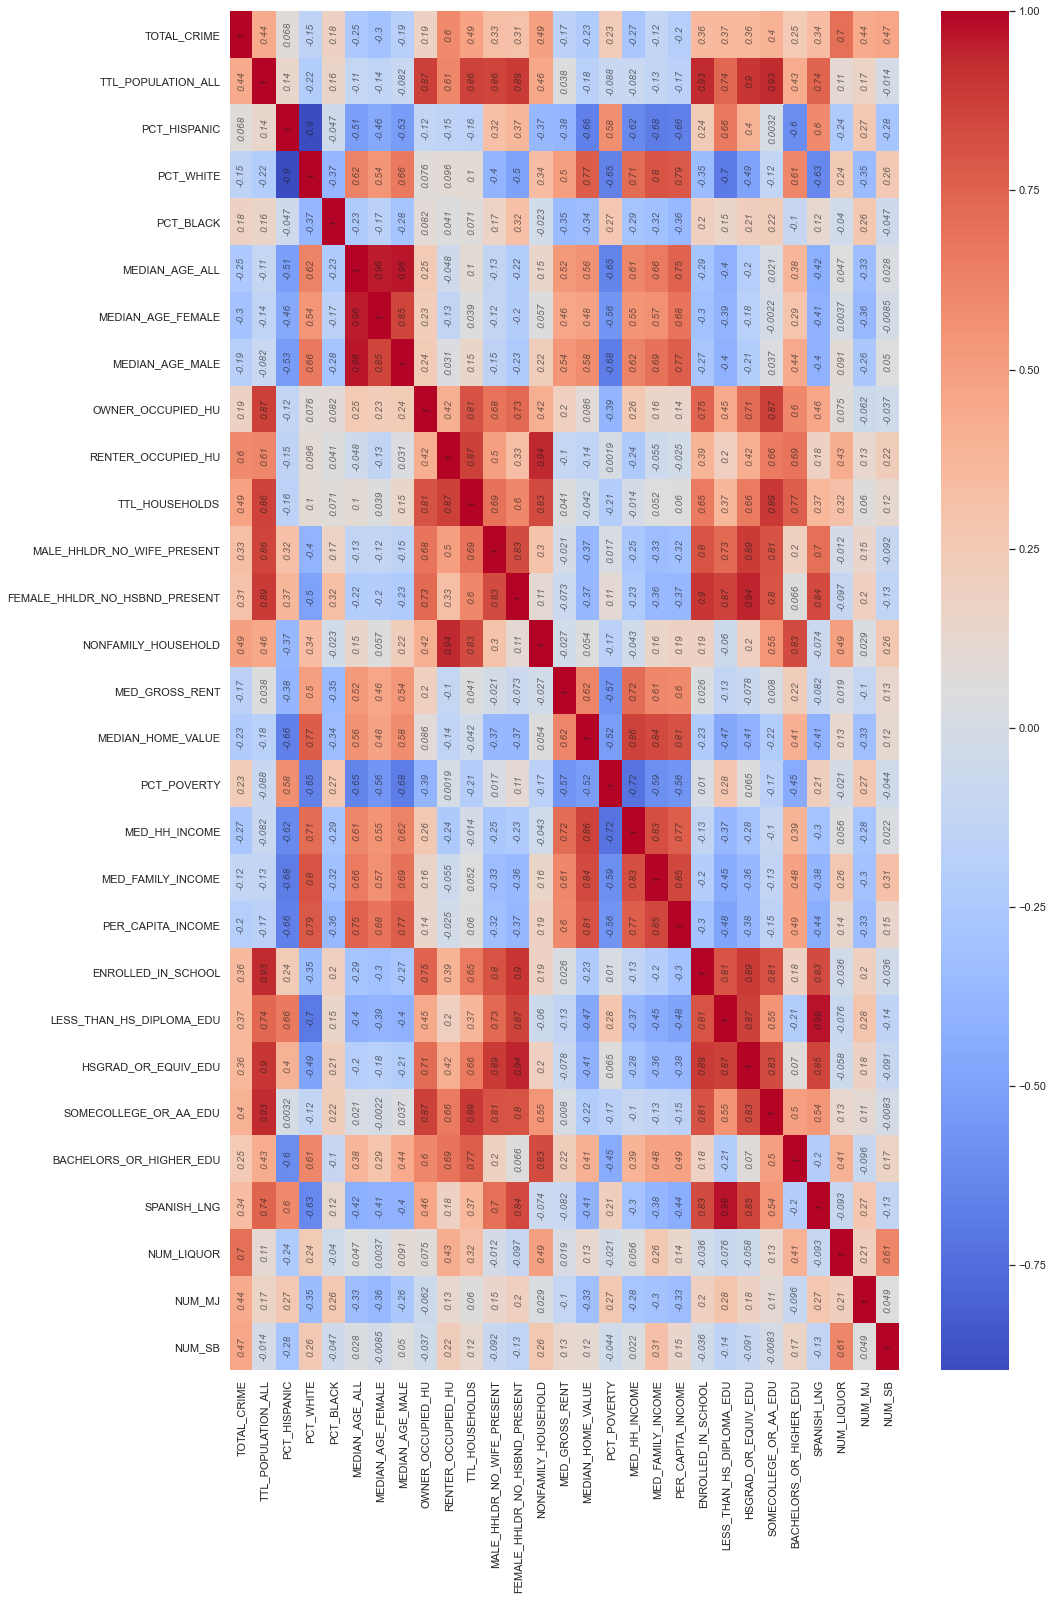

In [146]:
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", annot_kws=annot_kws)

A few variables stand out as having high positive correlation to crime. They are the number of liquor stores and the number of renter occupied households.

In [147]:
import statsmodels.formula.api as smf

In [148]:
from statsmodels.formula.api import ols

Fitting the model with one variable then all variables.

In [149]:
mod = smf.ols(formula="TOTAL_CRIME ~ TTL_POPULATION_ALL", data=final_df)

In [150]:
res = mod.fit()

In [151]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL_CRIME   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     18.14
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           5.97e-05
Time:                        10:22:49   Log-Likelihood:                -740.63
No. Observations:                  76   AIC:                             1485.
Df Residuals:                      74   BIC:                             1490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3536.4799    833

In [152]:
# encode df.NBHD_NAME as a factor
# final_df2 = final_df.copy()
# final_df2['NBHD_NAME'] = pd.Categorical(final_df.NBHD_NAME)

In [153]:
final_df.columns

Index(['NBHD_NAME', 'TOTAL_CRIME', 'TTL_POPULATION_ALL', 'PCT_HISPANIC',
       'PCT_WHITE', 'PCT_BLACK', 'MEDIAN_AGE_ALL', 'MEDIAN_AGE_FEMALE',
       'MEDIAN_AGE_MALE', 'OWNER_OCCUPIED_HU', 'RENTER_OCCUPIED_HU',
       'TTL_HOUSEHOLDS', 'MALE_HHLDR_NO_WIFE_PRESENT',
       'FEMALE_HHLDR_NO_HSBND_PRESENT', 'NONFAMILY_HOUSEHOLD',
       'MED_GROSS_RENT', 'MEDIAN_HOME_VALUE', 'PCT_POVERTY', 'MED_HH_INCOME',
       'MED_FAMILY_INCOME', 'PER_CAPITA_INCOME', 'ENROLLED_IN_SCHOOL',
       'LESS_THAN_HS_DIPLOMA_EDU', 'HSGRAD_OR_EQUIV_EDU',
       'SOMECOLLEGE_OR_AA_EDU', 'BACHELORS_OR_HIGHER_EDU', 'SPANISH_LNG',
       'NUM_LIQUOR', 'NUM_MJ', 'NUM_SB'],
      dtype='object')

In [154]:
#what I am trying to predict
y= final_df['TOTAL_CRIME']

In [155]:
# using all variables as predictors (removed NBHD_NAME)
X = final_df[['TTL_POPULATION_ALL', 'PCT_HISPANIC',
       'PCT_WHITE', 'PCT_BLACK', 'MEDIAN_AGE_ALL', 'MEDIAN_AGE_FEMALE',
       'MEDIAN_AGE_MALE', 'OWNER_OCCUPIED_HU', 'RENTER_OCCUPIED_HU',
       'TTL_HOUSEHOLDS', 'MALE_HHLDR_NO_WIFE_PRESENT',
       'FEMALE_HHLDR_NO_HSBND_PRESENT', 'NONFAMILY_HOUSEHOLD',
       'MED_GROSS_RENT', 'MEDIAN_HOME_VALUE', 'PCT_POVERTY', 'MED_HH_INCOME',
       'MED_FAMILY_INCOME', 'PER_CAPITA_INCOME', 'ENROLLED_IN_SCHOOL',
       'LESS_THAN_HS_DIPLOMA_EDU', 'HSGRAD_OR_EQUIV_EDU',
       'SOMECOLLEGE_OR_AA_EDU', 'BACHELORS_OR_HIGHER_EDU', 'SPANISH_LNG',
       'NUM_LIQUOR', 'NUM_MJ', 'NUM_SB']]

In [156]:
# Not sure why this doesn't work

# mod2 = smf.ols(formula='y ~ TTL_POPULATION_ALL, PCT_HISPANIC, \
       #PCT_WHITE, PCT_BLACK, MEDIAN_AGE_ALL, MEDIAN_AGE_MALE, \
       #MEDIAN_AGE_FEMALE, MEDIAN_AGE_ALL, MEDIAN_AGE_MALE, \
       #MEDIAN_AGE_FEMALE, OWNER_OCCUPIED_HU, RENTER_OCCUPIED_HU, \
       #TTL_HOUSEHOLDS, MALE_HHLDR_NO_WIFE_PRESENT, \
       #FEMALE_HHLDR_NO_HSBND_PRESENT, NONFAMILY_HOUSEHOLD, \
       #MALE_HHLDR_NO_WIFE_PRESENT, FEMALE_HHLDR_NO_HSBND_PRESENT, \
       #NONFAMILY_HOUSEHOLD, MED_GROSS_RENT, MEDIAN_HOME_VALUE, \
       #PCT_POVERTY, MED_HH_INCOME, MED_FAMILY_INCOME, \
       #PER_CAPITA_INCOME, ENROLLED_IN_SCHOOL, LESS_THAN_HS_DIPLOMA_EDU, \
       #HSGRAD_OR_EQUIV_EDU, SOMECOLLEGE_OR_AA_EDU, \
       #BACHELORS_OR_HIGHER_EDU, SPANISH_LNG, NUM_LIQUOR, NUM_MJ, \
       #NUM_SB', data=final_df).fit()

In [157]:
mod2 = smf.ols(formula='y ~ X', data=final_df).fit()

In [158]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     11.34
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           9.60e-10
Time:                        10:22:49   Log-Likelihood:                -512.13
No. Observations:                  59   AIC:                             1080.
Df Residuals:                      31   BIC:                             1138.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.443e+04   1.44e+04     -1.701      0.0

This model has an r-squared greated than 90 percent but there could be some multicolinearity issues, as indicated. I'll investigate using VIF.

But first recall X[0] is just the first element in the list below and so on and so forth.

In [159]:
listX = X.columns.values.tolist()
listX

['TTL_POPULATION_ALL',
 'PCT_HISPANIC',
 'PCT_WHITE',
 'PCT_BLACK',
 'MEDIAN_AGE_ALL',
 'MEDIAN_AGE_FEMALE',
 'MEDIAN_AGE_MALE',
 'OWNER_OCCUPIED_HU',
 'RENTER_OCCUPIED_HU',
 'TTL_HOUSEHOLDS',
 'MALE_HHLDR_NO_WIFE_PRESENT',
 'FEMALE_HHLDR_NO_HSBND_PRESENT',
 'NONFAMILY_HOUSEHOLD',
 'MED_GROSS_RENT',
 'MEDIAN_HOME_VALUE',
 'PCT_POVERTY',
 'MED_HH_INCOME',
 'MED_FAMILY_INCOME',
 'PER_CAPITA_INCOME',
 'ENROLLED_IN_SCHOOL',
 'LESS_THAN_HS_DIPLOMA_EDU',
 'HSGRAD_OR_EQUIV_EDU',
 'SOMECOLLEGE_OR_AA_EDU',
 'BACHELORS_OR_HIGHER_EDU',
 'SPANISH_LNG',
 'NUM_LIQUOR',
 'NUM_MJ',
 'NUM_SB']

In [160]:
my_list = [*range(0,28)]

Here's a key:

In [161]:
list(zip(listX, my_list))

[('TTL_POPULATION_ALL', 0),
 ('PCT_HISPANIC', 1),
 ('PCT_WHITE', 2),
 ('PCT_BLACK', 3),
 ('MEDIAN_AGE_ALL', 4),
 ('MEDIAN_AGE_FEMALE', 5),
 ('MEDIAN_AGE_MALE', 6),
 ('OWNER_OCCUPIED_HU', 7),
 ('RENTER_OCCUPIED_HU', 8),
 ('TTL_HOUSEHOLDS', 9),
 ('MALE_HHLDR_NO_WIFE_PRESENT', 10),
 ('FEMALE_HHLDR_NO_HSBND_PRESENT', 11),
 ('NONFAMILY_HOUSEHOLD', 12),
 ('MED_GROSS_RENT', 13),
 ('MEDIAN_HOME_VALUE', 14),
 ('PCT_POVERTY', 15),
 ('MED_HH_INCOME', 16),
 ('MED_FAMILY_INCOME', 17),
 ('PER_CAPITA_INCOME', 18),
 ('ENROLLED_IN_SCHOOL', 19),
 ('LESS_THAN_HS_DIPLOMA_EDU', 20),
 ('HSGRAD_OR_EQUIV_EDU', 21),
 ('SOMECOLLEGE_OR_AA_EDU', 22),
 ('BACHELORS_OR_HIGHER_EDU', 23),
 ('SPANISH_LNG', 24),
 ('NUM_LIQUOR', 25),
 ('NUM_MJ', 26),
 ('NUM_SB', 27)]

From this output you can see owner occupied housing has very little effect on crime based on the high P>|t|.

In [162]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
# create VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns

In [164]:
#find design matrix for linear regression model 
yy, XX = dmatrices('y ~ X', data=final_df, return_type='dataframe')

#calculate VIF for each variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VAR'] = XX.columns

#view VIF for each explanatory variable 
vif

C:\Users\john_\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,VAR
0,3152.177947,Intercept
1,1188.268479,X[0]
2,197.918951,X[1]
3,248.902481,X[2]
4,29.414755,X[3]
5,423.244874,X[4]
6,102.468381,X[5]
7,142.326049,X[6]
8,inf,X[7]
9,inf,X[8]


Anything over 10 suggest multicolinearity.

In [165]:
vif[vif["VIF"] < 10]

,VIF,VAR
11,7.759595,X[10]
14,6.000381,X[13]
16,8.080478,X[15]
19,8.616726,X[18]
26,3.630111,X[25]
27,2.166118,X[26]
28,3.536602,X[27]


These 7 variables are less likely to have multicolinearity. They are...

In [166]:
listX[10], listX[13], listX[15], listX[18], listX[25], listX[26], listX[27]

('MALE_HHLDR_NO_WIFE_PRESENT',
 'MED_GROSS_RENT',
 'PCT_POVERTY',
 'PER_CAPITA_INCOME',
 'NUM_LIQUOR',
 'NUM_MJ',
 'NUM_SB')

These are the variables that will be used in my final model.

In [167]:
final_df2 = final_df[['MALE_HHLDR_NO_WIFE_PRESENT',
 'MED_GROSS_RENT',
 'PCT_POVERTY',
 'PER_CAPITA_INCOME',
 'NUM_LIQUOR',
 'NUM_MJ',
 'NUM_SB',
 'TOTAL_CRIME'
 ]]
final_df2

,MALE_HHLDR_NO_WIFE_PRESENT,MED_GROSS_RENT,PCT_POVERTY,PER_CAPITA_INCOME,NUM_LIQUOR,NUM_MJ,NUM_SB,TOTAL_CRIME
0,81.0,1109.00,10.30,19447.42,7.0,1.0,0.0,2545.0
1,213.0,771.67,20.60,20623.15,26.0,6.0,1.0,6079.0
2,173.0,1312.50,14.95,26129.55,85.0,7.0,2.0,9527.0
3,99.0,919.00,34.60,14350.97,14.0,13.0,1.0,7907.0
4,77.0,804.00,27.60,15539.62,18.0,2.0,1.0,4888.0
...,...,...,...,...,...,...,...,...
73,52.0,915.00,24.80,15979.27,3.0,NaN,0.0,3478.0
74,593.0,1374.75,7.80,0.00,28.0,NaN,0.0,12246.0
75,83.0,721.00,7.40,37005.50,0.0,NaN,0.0,NaN
76,337.0,1014.33,23.57,21514.04,157.0,17.0,1.0,27806.0


In [168]:
y3 = final_df2['TOTAL_CRIME']

In [169]:
X3 = final_df2[['MALE_HHLDR_NO_WIFE_PRESENT',
 'MED_GROSS_RENT',
 'PCT_POVERTY',
 'PER_CAPITA_INCOME',
 'NUM_LIQUOR',
 'NUM_MJ',
 'NUM_SB']]

In [170]:
mod3 = smf.ols(formula='y3 ~ X3', data=final_df2).fit()

In [171]:
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     15.02
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.85e-10
Time:                        10:22:49   Log-Likelihood:                -549.52
No. Observations:                  59   AIC:                             1115.
Df Residuals:                      51   BIC:                             1132.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    802.8437   2209.223      0.363      0.7

R-squard dropped quite a bit. One way to tackle multicolinearity, and possibly to include more variables and get that back up, would be to exclude all female.

But first, let's look at how the predictive variables relate to crime using a pairplot.

Wall time: 3.26 s


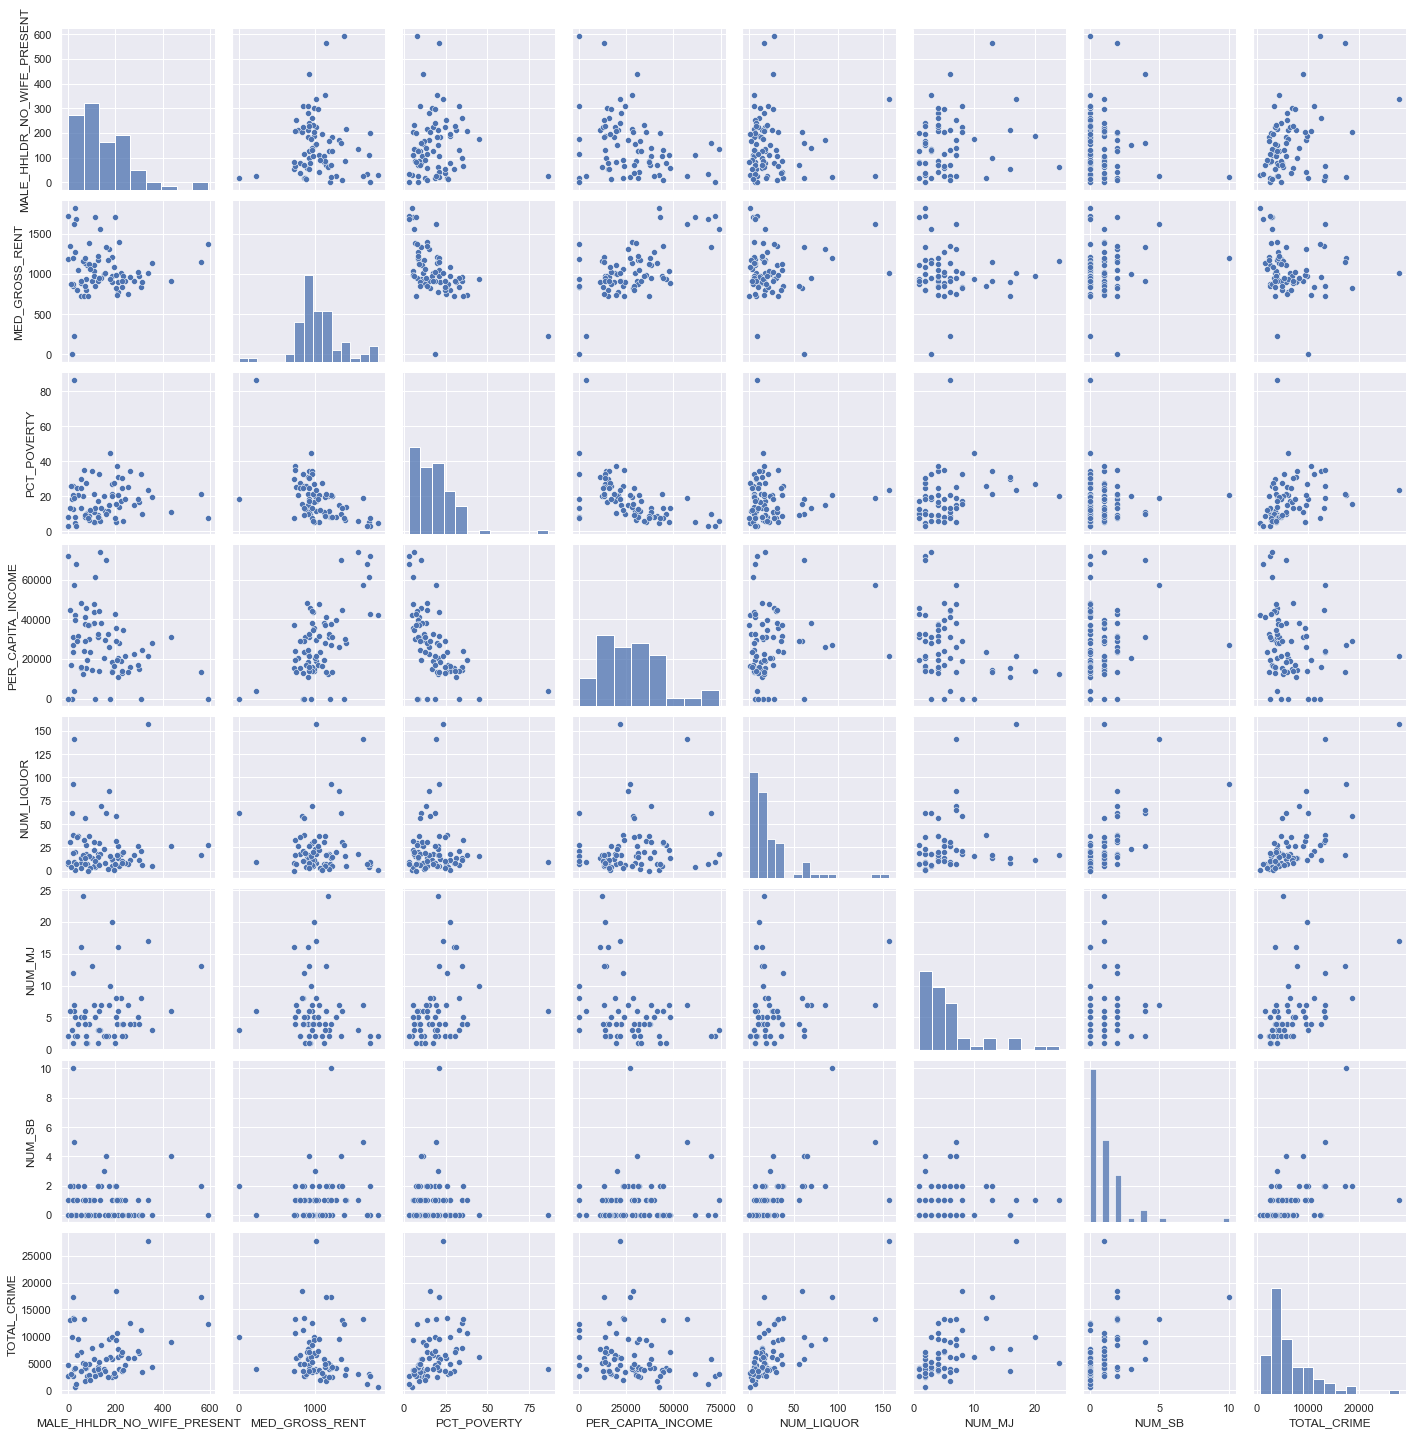

In [172]:
%%time
sns.pairplot(final_df2)

You can see fewer crimes happen when there is a wife present. I suppose that makes sense! You can also see crime increases somewhat with an increase in poverty and the number of liquor stores. There is also weaker, direct positive relationship between crime and the number of mj dispensaries. Interestingly, there does not appear to be a strong relationship between crime and income.

I probably should have created this pairplot earlier. I would have seen that there really aren't strong linear relationships between the predictor variables and crime. This is another reason my model results aren't ideal.

Now onto tackling multicolineraity a bit more...

In [173]:
y4= final_df['TOTAL_CRIME']

In [174]:
X4 = final_df[['TTL_POPULATION_ALL', 'PCT_HISPANIC',
       'PCT_WHITE', 'PCT_BLACK', 'MEDIAN_AGE_ALL',
       'MEDIAN_AGE_MALE', 'RENTER_OCCUPIED_HU',
       'TTL_HOUSEHOLDS', 'MALE_HHLDR_NO_WIFE_PRESENT', 'NONFAMILY_HOUSEHOLD',
       'MED_GROSS_RENT', 'MEDIAN_HOME_VALUE', 'PCT_POVERTY', 'MED_HH_INCOME',
       'MED_FAMILY_INCOME', 'PER_CAPITA_INCOME', 'ENROLLED_IN_SCHOOL',
       'LESS_THAN_HS_DIPLOMA_EDU', 'HSGRAD_OR_EQUIV_EDU',
       'SOMECOLLEGE_OR_AA_EDU', 'BACHELORS_OR_HIGHER_EDU', 'SPANISH_LNG',
       'NUM_LIQUOR', 'NUM_MJ', 'NUM_SB']]

In [175]:
mod4 = smf.ols(formula='y4 ~ X4', data=final_df).fit()

In [176]:
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     10.14
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           2.25e-09
Time:                        10:22:55   Log-Likelihood:                -518.76
No. Observations:                  59   AIC:                             1090.
Df Residuals:                      33   BIC:                             1144.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.646e+04   1.53e+04     -1.080      0.2

In [177]:
#find design matrix for linear regression model 
yy, XX = dmatrices('y4 ~ X4', data=final_df, return_type='dataframe')

#calculate VIF for each variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VAR'] = XX.columns

#view VIF for each explanatory variable 
vif

,VIF,VAR
0,3023.475979,Intercept
1,1105.907508,X4[0]
2,194.614779,X4[1]
3,237.383647,X4[2]
4,27.663122,X4[3]
5,44.145924,X4[4]
6,33.714786,X4[5]
7,80.648674,X4[6]
8,516.060379,X4[7]
9,7.684521,X4[8]


In [178]:
vif[vif["VIF"] < 10]

,VIF,VAR
9,7.684521,X4[8]
11,5.842625,X4[10]
13,6.424746,X4[12]
16,8.453799,X4[15]
23,3.515977,X4[22]
24,2.024205,X4[23]
25,3.363434,X4[24]


Below is my first list that shows the variables least likely to suffer from multicolinearity.

In [179]:
listX3 = X3.columns.values.tolist()
listX3

['MALE_HHLDR_NO_WIFE_PRESENT',
 'MED_GROSS_RENT',
 'PCT_POVERTY',
 'PER_CAPITA_INCOME',
 'NUM_LIQUOR',
 'NUM_MJ',
 'NUM_SB']

And now the list from above with my subjective edits post VIF testing...

In [180]:
listX4 = X4.columns.values.tolist()
listX4

['TTL_POPULATION_ALL',
 'PCT_HISPANIC',
 'PCT_WHITE',
 'PCT_BLACK',
 'MEDIAN_AGE_ALL',
 'MEDIAN_AGE_MALE',
 'RENTER_OCCUPIED_HU',
 'TTL_HOUSEHOLDS',
 'MALE_HHLDR_NO_WIFE_PRESENT',
 'NONFAMILY_HOUSEHOLD',
 'MED_GROSS_RENT',
 'MEDIAN_HOME_VALUE',
 'PCT_POVERTY',
 'MED_HH_INCOME',
 'MED_FAMILY_INCOME',
 'PER_CAPITA_INCOME',
 'ENROLLED_IN_SCHOOL',
 'LESS_THAN_HS_DIPLOMA_EDU',
 'HSGRAD_OR_EQUIV_EDU',
 'SOMECOLLEGE_OR_AA_EDU',
 'BACHELORS_OR_HIGHER_EDU',
 'SPANISH_LNG',
 'NUM_LIQUOR',
 'NUM_MJ',
 'NUM_SB']

In [181]:
new_list = listX3 + listX4
new_list

['MALE_HHLDR_NO_WIFE_PRESENT',
 'MED_GROSS_RENT',
 'PCT_POVERTY',
 'PER_CAPITA_INCOME',
 'NUM_LIQUOR',
 'NUM_MJ',
 'NUM_SB',
 'TTL_POPULATION_ALL',
 'PCT_HISPANIC',
 'PCT_WHITE',
 'PCT_BLACK',
 'MEDIAN_AGE_ALL',
 'MEDIAN_AGE_MALE',
 'RENTER_OCCUPIED_HU',
 'TTL_HOUSEHOLDS',
 'MALE_HHLDR_NO_WIFE_PRESENT',
 'NONFAMILY_HOUSEHOLD',
 'MED_GROSS_RENT',
 'MEDIAN_HOME_VALUE',
 'PCT_POVERTY',
 'MED_HH_INCOME',
 'MED_FAMILY_INCOME',
 'PER_CAPITA_INCOME',
 'ENROLLED_IN_SCHOOL',
 'LESS_THAN_HS_DIPLOMA_EDU',
 'HSGRAD_OR_EQUIV_EDU',
 'SOMECOLLEGE_OR_AA_EDU',
 'BACHELORS_OR_HIGHER_EDU',
 'SPANISH_LNG',
 'NUM_LIQUOR',
 'NUM_MJ',
 'NUM_SB']

I need to remove some duplicates..

In [182]:
print ("The original list is : " +  str(new_list))

res = []
for i in new_list:
    if i not in res:
        res.append(i)
        
print ("The list after removing duplicates : " + str(res))

The original list is : ['MALE_HHLDR_NO_WIFE_PRESENT', 'MED_GROSS_RENT', 'PCT_POVERTY', 'PER_CAPITA_INCOME', 'NUM_LIQUOR', 'NUM_MJ', 'NUM_SB', 'TTL_POPULATION_ALL', 'PCT_HISPANIC', 'PCT_WHITE', 'PCT_BLACK', 'MEDIAN_AGE_ALL', 'MEDIAN_AGE_MALE', 'RENTER_OCCUPIED_HU', 'TTL_HOUSEHOLDS', 'MALE_HHLDR_NO_WIFE_PRESENT', 'NONFAMILY_HOUSEHOLD', 'MED_GROSS_RENT', 'MEDIAN_HOME_VALUE', 'PCT_POVERTY', 'MED_HH_INCOME', 'MED_FAMILY_INCOME', 'PER_CAPITA_INCOME', 'ENROLLED_IN_SCHOOL', 'LESS_THAN_HS_DIPLOMA_EDU', 'HSGRAD_OR_EQUIV_EDU', 'SOMECOLLEGE_OR_AA_EDU', 'BACHELORS_OR_HIGHER_EDU', 'SPANISH_LNG', 'NUM_LIQUOR', 'NUM_MJ', 'NUM_SB']
The list after removing duplicates : ['MALE_HHLDR_NO_WIFE_PRESENT', 'MED_GROSS_RENT', 'PCT_POVERTY', 'PER_CAPITA_INCOME', 'NUM_LIQUOR', 'NUM_MJ', 'NUM_SB', 'TTL_POPULATION_ALL', 'PCT_HISPANIC', 'PCT_WHITE', 'PCT_BLACK', 'MEDIAN_AGE_ALL', 'MEDIAN_AGE_MALE', 'RENTER_OCCUPIED_HU', 'TTL_HOUSEHOLDS', 'NONFAMILY_HOUSEHOLD', 'MEDIAN_HOME_VALUE', 'MED_HH_INCOME', 'MED_FAMILY_INCOME'

In [183]:
y5= final_df['TOTAL_CRIME']

In [184]:
X5 = final_df[['MALE_HHLDR_NO_WIFE_PRESENT', 'MED_GROSS_RENT', 'PCT_POVERTY', 'PER_CAPITA_INCOME', 'NUM_LIQUOR', 'NUM_MJ', 'NUM_SB', 'TTL_POPULATION_ALL', 'PCT_HISPANIC', 'PCT_WHITE', 'PCT_BLACK', 'MEDIAN_AGE_ALL', 'MEDIAN_AGE_MALE', 'RENTER_OCCUPIED_HU', 'TTL_HOUSEHOLDS', 'NONFAMILY_HOUSEHOLD', 'MEDIAN_HOME_VALUE', 'MED_HH_INCOME', 'MED_FAMILY_INCOME', 'ENROLLED_IN_SCHOOL', 'LESS_THAN_HS_DIPLOMA_EDU', 'HSGRAD_OR_EQUIV_EDU', 'SOMECOLLEGE_OR_AA_EDU', 'BACHELORS_OR_HIGHER_EDU', 'SPANISH_LNG']]

In [185]:
mod5 = smf.ols(formula='y5 ~ X5', data=final_df).fit()

In [186]:
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:                     y5   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     10.14
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           2.25e-09
Time:                        10:22:55   Log-Likelihood:                -518.76
No. Observations:                  59   AIC:                             1090.
Df Residuals:                      33   BIC:                             1144.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.646e+04   1.53e+04     -1.080      0.2

Checking again for multicolinearity one last time...

In [187]:
#find design matrix for linear regression model 
yy, XX = dmatrices('y5 ~ X5', data=final_df, return_type='dataframe')

#calculate VIF for each variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VAR'] = XX.columns

#view VIF for each explanatory variable 
vif

,VIF,VAR
0,3023.475979,Intercept
1,7.684521,X5[0]
2,5.842625,X5[1]
3,6.424746,X5[2]
4,8.453799,X5[3]
5,3.515977,X5[4]
6,2.024205,X5[5]
7,3.363434,X5[6]
8,1105.907508,X5[7]
9,194.614779,X5[8]


In [188]:
vif[vif["VIF"] < 10]

,VIF,VAR
1,7.684521,X5[0]
2,5.842625,X5[1]
3,6.424746,X5[2]
4,8.453799,X5[3]
5,3.515977,X5[4]
6,2.024205,X5[5]
7,3.363434,X5[6]


Only the first 6 look like good candidates now.

In [189]:
X6 = final_df[['MALE_HHLDR_NO_WIFE_PRESENT', 'MED_GROSS_RENT', 'PCT_POVERTY', 'PER_CAPITA_INCOME', \
               'NUM_LIQUOR', 'NUM_MJ']]

In [190]:
y6= final_df['TOTAL_CRIME']

In [191]:
mod6 = smf.ols(formula='y6 ~ X6', data=final_df).fit()

In [192]:
print(mod6.summary())

                            OLS Regression Results                            
Dep. Variable:                     y6   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     17.62
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           5.23e-11
Time:                        10:22:55   Log-Likelihood:                -549.80
No. Observations:                  59   AIC:                             1114.
Df Residuals:                      52   BIC:                             1128.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    676.2988   2190.628      0.309      0.7

You can see there is still some multicolinearity but after several iterations this might be as good as it gets. The model isn't perfect by any stretch because of this, but the r-squared is reasonable I suppose. I am beginning to learn it isn't easy to predict crime! Let's evaluate mod6 with some diagnostic plots next...

In [193]:
import statsmodels.api as sm
import scipy.stats as stats

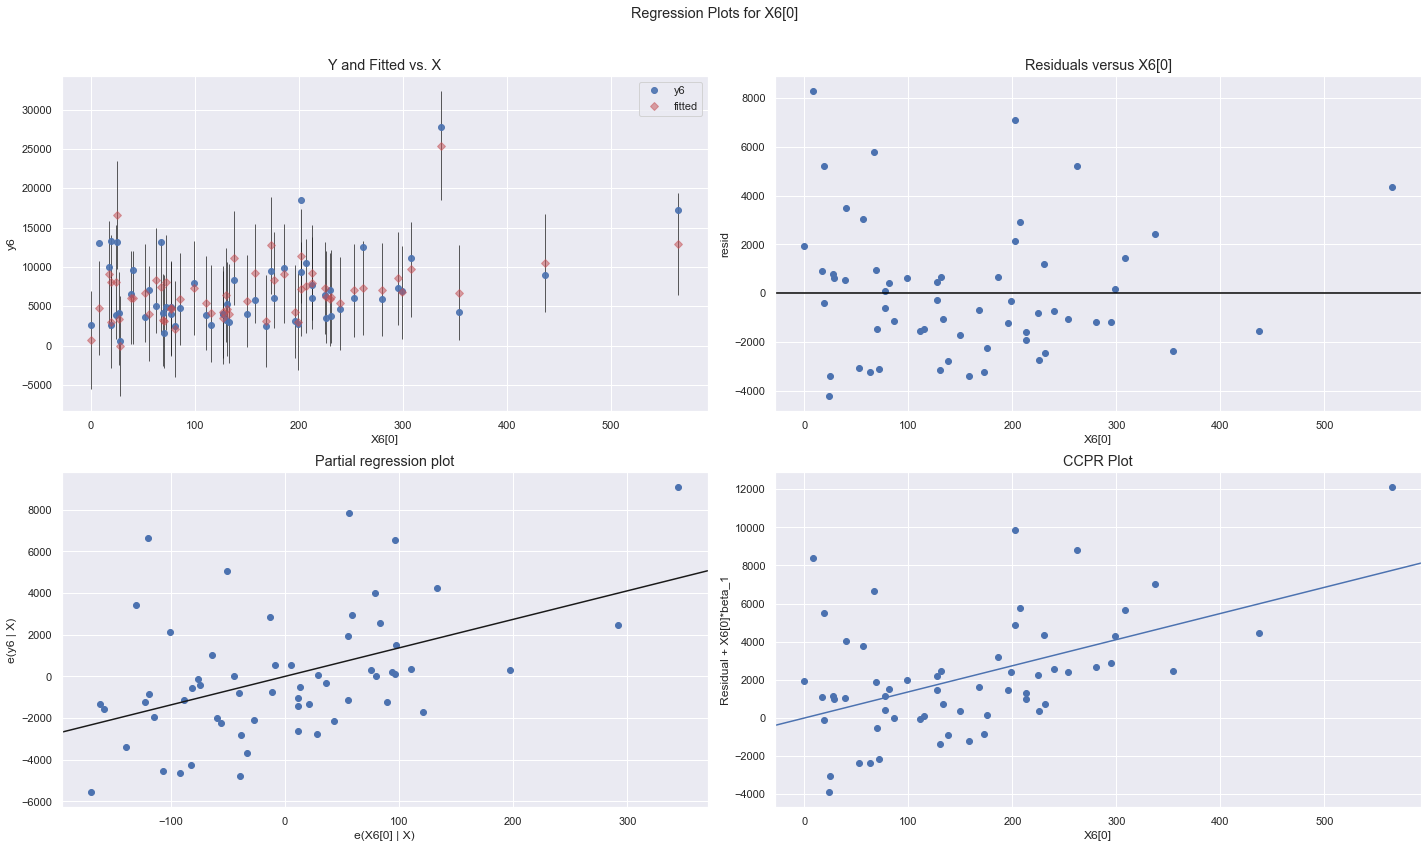

In [194]:
## TO CREATE DIAGNOSTIC PLOTS (eqivalent to MASS lib plot(modelname) in R)

#RESIDUALS V FITTED PLOT FOR PREDICTOR VARIABLE X6[0] = 'MALE_HHLDR_NO_WIFE_PRESENT'

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_regress_exog(mod6, 'X6[0]', fig=fig) 


For the most part the residuals seem to be randomly scattered around zero, which means this predictor does not likely have heteroscedascity issues.

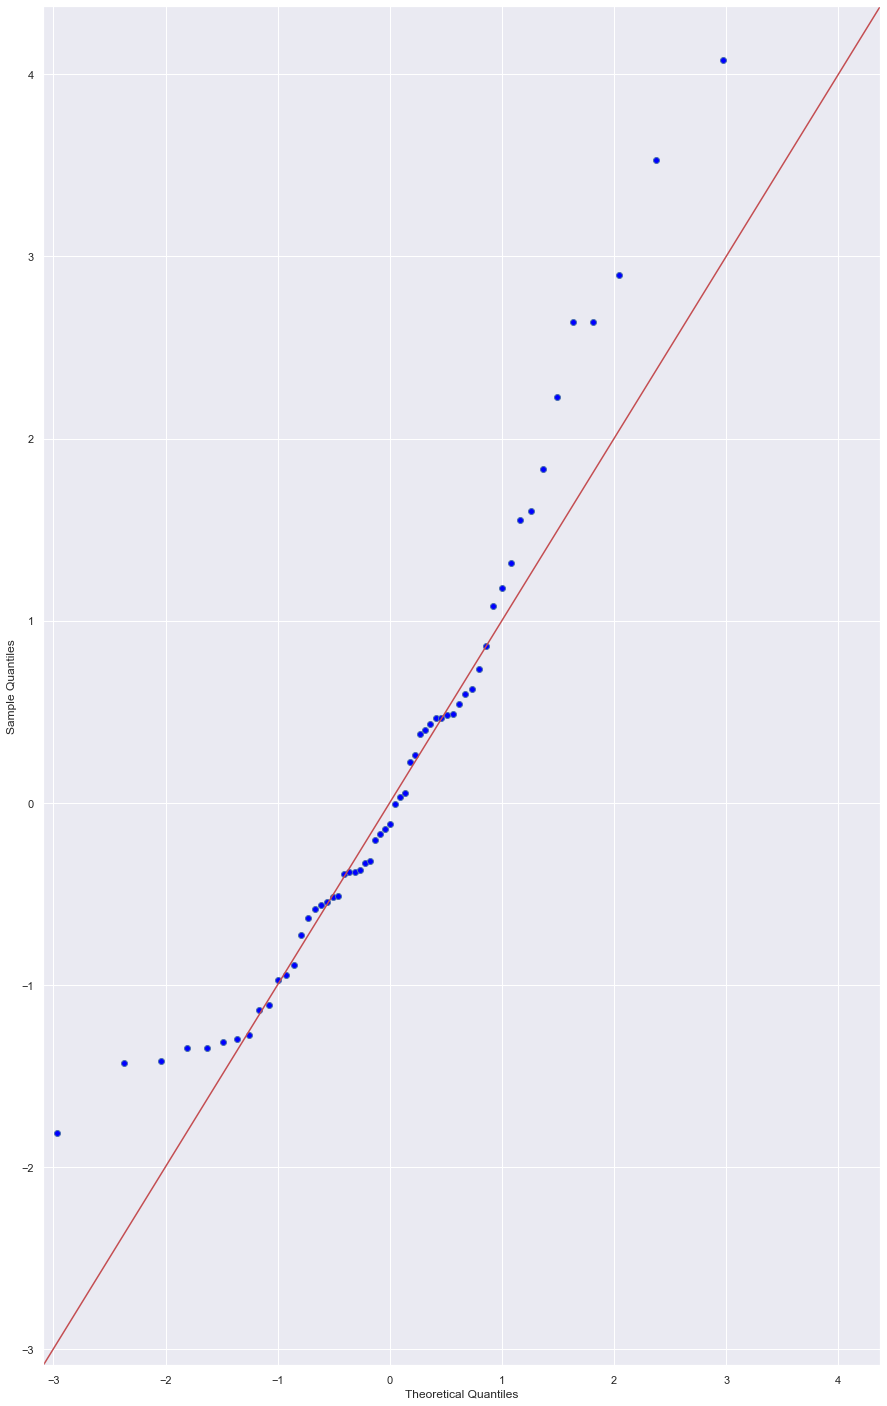

In [195]:
# NORMAL Q-Q PLOT

res = mod6.resid
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.rc("figure", figsize=(10,10)) 
plt.show()

I can see there are issues at the high end low end of things. My errors are probably not normally distributed.

C:\Users\john_\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

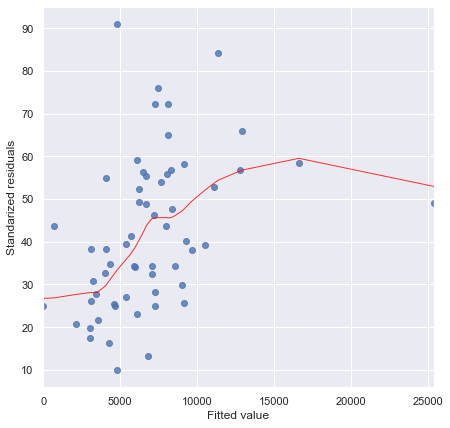

In [196]:
# SCALE LOCATION PLOT

from sklearn.linear_model import LinearRegression

predictions = mod6.predict()

model_norm_residuals_abs_sqrt=np.sqrt(np.abs(res))

plt.figure(figsize=(7,7))
sns.regplot(predictions, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

This plot suggests non-linearity. You want the red line to be horizontal. I'll perform a Breusch-Pagan test to determine if heteroscedasticity is present.

In [197]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(mod6.resid, mod6.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 7.491221846711614),
 ('p-value', 0.2777949608054255),
 ('f-value', 1.2604438505275601),
 ('f p-value', 0.2917501897085149)]

Because this p-value is not less than 0.05, I fail to reject the null hypothesis (Homoscedasticity is present/Hetero is not present). I could look at using a weighted regression to fix the problem of heteroscedasticity. "Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that the residuals come from a population that has homoscedasticity, which means constant variance. When heteroscedasticity is present in a regression analysis, the results of the analysis become hard to trust." - https://www.statology.org/breusch-pagan-test-python/

Let's back up and simplify things a bit and look at values of greater than 40 percent in our corrMatrix. 

In [198]:
corrMatrix['TOTAL_CRIME'] > .40

TOTAL_CRIME                       True
TTL_POPULATION_ALL                True
PCT_HISPANIC                     False
PCT_WHITE                        False
PCT_BLACK                        False
MEDIAN_AGE_ALL                   False
MEDIAN_AGE_FEMALE                False
MEDIAN_AGE_MALE                  False
OWNER_OCCUPIED_HU                False
RENTER_OCCUPIED_HU                True
TTL_HOUSEHOLDS                    True
MALE_HHLDR_NO_WIFE_PRESENT       False
FEMALE_HHLDR_NO_HSBND_PRESENT    False
NONFAMILY_HOUSEHOLD               True
MED_GROSS_RENT                   False
MEDIAN_HOME_VALUE                False
PCT_POVERTY                      False
MED_HH_INCOME                    False
MED_FAMILY_INCOME                False
PER_CAPITA_INCOME                False
ENROLLED_IN_SCHOOL               False
LESS_THAN_HS_DIPLOMA_EDU         False
HSGRAD_OR_EQUIV_EDU              False
SOMECOLLEGE_OR_AA_EDU             True
BACHELORS_OR_HIGHER_EDU          False
SPANISH_LNG              

I know there is high correlation between total households, the number of liquor stores and Starbucks, and total population. There is also correlation between crime and renters and non-family households but there might be colinearity issues with total households so I won't look include those variables in my next model.

In [199]:
X7 = final_df[['TTL_HOUSEHOLDS', 'NUM_LIQUOR', 'NUM_SB', 'TTL_POPULATION_ALL','NUM_MJ', 'SOMECOLLEGE_OR_AA_EDU']]

In [200]:
y7 = final_df['TOTAL_CRIME']

In [201]:
mod7 = smf.ols(formula='y7 ~ X7', data=final_df).fit()

In [202]:
print(mod7.summary())

                            OLS Regression Results                            
Dep. Variable:                     y7   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     17.34
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           6.82e-11
Time:                        10:22:57   Log-Likelihood:                -550.11
No. Observations:                  59   AIC:                             1114.
Df Residuals:                      52   BIC:                             1129.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    280.8975    861.613      0.326      0.7

In [203]:
#find design matrix for linear regression model 
yy, XX = dmatrices('y7 ~ X7', data=final_df, return_type='dataframe')

#calculate VIF for each variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VAR'] = XX.columns

#view VIF for each explanatory variable 
vif

,VIF,VAR
0,5.253857,Intercept
1,8.150980,X7[0]
2,1.918235,X7[1]
3,1.521791,X7[2]
4,5.411191,X7[3]
5,1.162928,X7[4]
6,9.421440,X7[5]


The VIFs are looking better. The number of Starbucks, total population and the number of mj dispensaries do not appear to have much colinearity. The other variables look fine, too, with maybe the last one dealing with education level. Here is my revised model.

In [204]:
X8 = final_df[['NUM_LIQUOR', 'NUM_SB', 'TTL_POPULATION_ALL','NUM_MJ']]

In [205]:
y8 = final_df['TOTAL_CRIME']

In [206]:
mod8 = smf.ols(formula='y8 ~ X8', data=final_df).fit()

In [207]:
print(mod8.summary())

                            OLS Regression Results                            
Dep. Variable:                     y8   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     26.84
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           2.76e-12
Time:                        10:22:57   Log-Likelihood:                -550.23
No. Observations:                  59   AIC:                             1110.
Df Residuals:                      54   BIC:                             1121.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    238.9211    810.136      0.295      0.7

Despite the warning sign I know there isn't super strong multicolinearity with the variables I have chosen. Let's check for heteroscedasticity again.

In [208]:
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(mod8.resid, mod8.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 7.56610241842676),
 ('p-value', 0.10882953303395886),
 ('f-value', 1.985896217310097),
 ('f p-value', 0.1097246410301435)]

The p-value is lower but it is still higher than .05 so I have to assume I have heteroscedasticity still.

Upon closer inspection of my OLS results it looks like X8[1] or the number of Starbucks has a fairly high probablility of not influencing crime based on the P>|t| output. I'll rerun the model without this variable.

In [209]:
X9 = final_df[['NUM_LIQUOR','TTL_POPULATION_ALL','NUM_MJ']]

In [210]:
y9 = final_df['TOTAL_CRIME']

In [211]:
mod9 = smf.ols(formula='y9 ~ X9', data=final_df).fit()

In [212]:
print(mod9.summary())

                            OLS Regression Results                            
Dep. Variable:                     y9   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     36.37
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           4.33e-13
Time:                        10:22:57   Log-Likelihood:                -550.28
No. Observations:                  59   AIC:                             1109.
Df Residuals:                      55   BIC:                             1117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    278.6275    791.098      0.352      0.7

Since this is a multivariate regression I am really interested in the adjusted R-squared which is .647 now. You can also see  P>|t| indicates there is nearly a 100% chance all 3 predictor variables influence crime. However, Prob(Omnibus) tells me there is near zero chance my residuals are normally distributed. In addition, my data are highly skewed (near 0).

# Nonetheless my final equation is... 

*total crime = 91 * number of liquor stores +  0.33 * total population + 255 * number of marijuana dispensaries + 278.63*

The bottom line is you cannot easily model the number of crimes based on these variables because the relationships are only loosely linear. Had I found an acceptable model I would have split into test/train but since I cannot recommend any one of these models as being reliable, I will not. There's no need.

Next I will look at bit closer at the results from my final model and compare to the true results.

In [213]:
true_crime = final_df['TOTAL_CRIME']
true_crime

0      2545.0
1      6079.0
2      9527.0
3      7907.0
4      4888.0
       ...   
73     3478.0
74    12246.0
75        NaN
76    27806.0
77        NaN
Name: TOTAL_CRIME, Length: 78, dtype: float64

In [214]:
predicted_crime = mod9.predict(final_df)
predicted_crime

0      2507.928051
1      7425.992877
2     12777.586384
3      6042.381815
4      3362.475060
          ...     
73             NaN
74             NaN
75             NaN
76    23795.298674
77             NaN
Length: 78, dtype: float64

Let's see where the model did the best.

In [215]:
my_list = list(true_crime - predicted_crime)
my_list

[37.071949237709305,
 -1346.9928773165684,
 -3250.586384416405,
 1864.6181851454821,
 1525.5249403730522,
 816.3356640439347,
 -2752.5918148858646,
 -358.64425462458894,
 420.8666980992166,
 -169.02917787768274,
 -1409.0101361247796,
 -2027.6349442380742,
 -1632.2957609639607,
 1430.4090938861664,
 nan,
 -1135.7691082830406,
 -1290.6819254823695,
 nan,
 -3258.261177896058,
 -1624.430388737168,
 2833.813157309237,
 -624.8804524746483,
 nan,
 42.065327542075465,
 1405.265535958708,
 6461.858567586909,
 nan,
 nan,
 -3135.841275702751,
 -543.2336023691969,
 -3965.261378115889,
 -291.73180556728767,
 nan,
 -1524.3157636184842,
 4605.549257903662,
 -1429.1262702825552,
 nan,
 nan,
 nan,
 -60.750017443378965,
 1370.82523152132,
 -27.31676462776204,
 -1718.25347431946,
 -569.8108579532104,
 -2144.858297498031,
 -782.9411086091204,
 -3930.7652510602275,
 -2721.2986527920766,
 nan,
 nan,
 -668.1680660083493,
 5589.561380704396,
 2958.6948441263166,
 7809.910380922202,
 nan,
 -3356.486507405585,


The model did the best where there was only a difference of 37.07194923773477 and 42.06532754202999. These are the only two values under 100. I'll determine which neighborhoods those values correspond to next.

In [216]:
my_list.index(37.071949237709305) # position in final_df

0

In [217]:
final_df.iloc[0][0]

'CHAFFEE PARK'

In [218]:
my_list.index(42.065327542075465) #  position in final_df

23

In [219]:
final_df.iloc[23][0]

'MAR LEE'

Here's a look at the actual total crime vs predicted crime from my model.

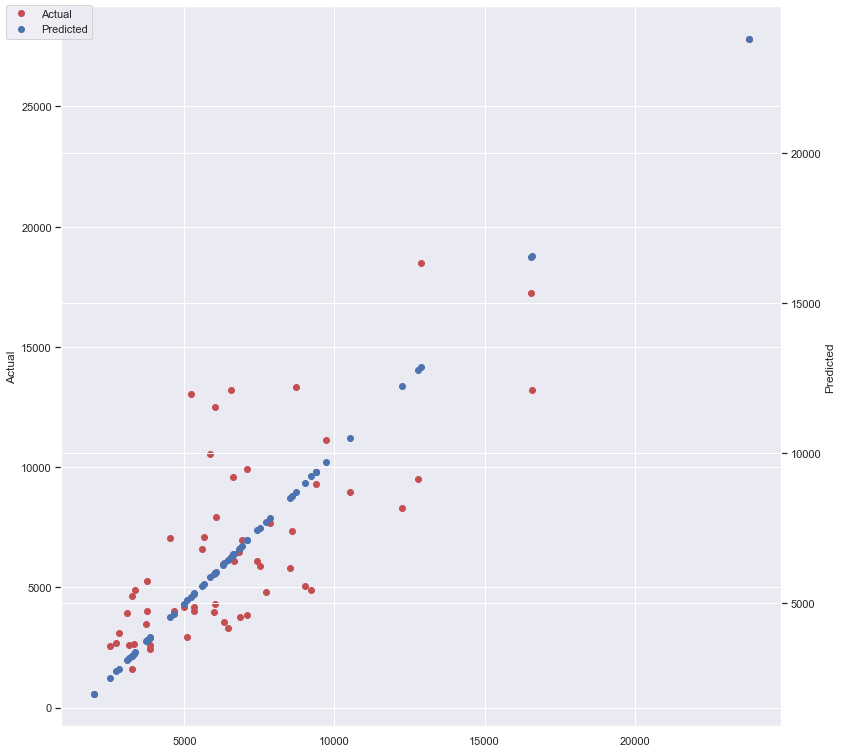

In [220]:
fig = plt.figure(figsize=(10,10))
a1 = fig.add_axes([0,0,1,1])
x = predicted_crime
a1.plot(x,true_crime, 'ro')
a1.set_ylabel('Actual')
a2 = a1.twinx()
a2.plot(x, predicted_crime,'o')
a2.set_ylabel('Predicted')
fig.legend(labels = ('Actual','Predicted'),loc='upper left')
plt.show()

I would have wanted the red dots clustered closer to the blue line. Just another confirmation this model is a bust!

In [221]:
#from sklearn.model_selection import train_test_split 

In [222]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

Recursive Feature Elimination:

A popular feature selection method within sklearn is the Recursive Feature Elimination.  RFE selects features by considering a smaller and smaller set of regressors.  The starting point is the original set of regressors. Less important regressors are recursively pruned from the initial set.  The procedure is repeated until a desired set of features remain.  That number can either be a priori specified, or can be found using cross validation. In fact, RFE offers a variant – RFECV – designed to optimally find the best subset of regressors.  

https://www.datasklr.com/ols-least-squares-regression/variable-selection

In [223]:
df2 = final_df.copy() # creating a copy because I have to make edits before passing through the recursive feature elimination

In [224]:
df2

,NBHD_NAME,TOTAL_CRIME,TTL_POPULATION_ALL,PCT_HISPANIC,PCT_WHITE,PCT_BLACK,MEDIAN_AGE_ALL,MEDIAN_AGE_FEMALE,MEDIAN_AGE_MALE,OWNER_OCCUPIED_HU,...,PER_CAPITA_INCOME,ENROLLED_IN_SCHOOL,LESS_THAN_HS_DIPLOMA_EDU,HSGRAD_OR_EQUIV_EDU,SOMECOLLEGE_OR_AA_EDU,BACHELORS_OR_HIGHER_EDU,SPANISH_LNG,NUM_LIQUOR,NUM_MJ,NUM_SB
0,CHAFFEE PARK,2545.0,4045.0,57.92,37.23,1.46,36.20,38.10,32.80,1128.0,...,19447.42,801.0,715.0,738.0,741.0,723.0,1361.0,7.0,1.0,0.0
1,SUNNYSIDE,6079.0,9832.0,50.50,42.24,3.03,34.53,35.53,33.77,2282.0,...,20623.15,2108.0,1549.0,1714.0,1487.0,2463.0,2302.0,26.0,6.0,1.0
2,HIGHLAND,9527.0,8991.0,28.21,64.09,3.92,32.85,31.85,33.50,2132.0,...,26129.55,1672.0,760.0,742.0,1283.0,4132.0,1426.0,85.0,7.0,2.0
3,GLOBEVILLE,7907.0,3551.0,61.33,32.64,3.27,30.30,30.40,30.20,387.0,...,14350.97,1092.0,636.0,692.0,459.0,374.0,1366.0,14.0,13.0,1.0
4,JEFFERSON PARK,4888.0,2827.0,51.43,39.41,4.88,31.50,31.80,30.90,412.0,...,15539.62,524.0,726.0,265.0,296.0,774.0,1260.0,18.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,CLAYTON,3478.0,4250.0,42.45,28.59,26.05,32.90,32.70,33.30,845.0,...,15979.27,1060.0,860.0,607.0,589.0,693.0,1649.0,3.0,NaN,0.0
74,GATEWAY GREEN VALLEY RANCH,12246.0,34957.0,41.38,22.87,27.10,31.50,30.63,32.10,7127.0,...,0.00,11831.0,4193.0,5310.0,7079.0,4510.0,10548.0,28.0,NaN,0.0
75,INDIAN CREEK,NaN,3512.0,14.41,64.41,14.38,39.70,42.80,37.70,1305.0,...,37005.50,585.0,116.0,404.0,715.0,1646.0,377.0,0.0,NaN,0.0
76,FIVE POINTS,27806.0,14768.0,18.57,62.68,13.63,33.93,32.97,34.87,2218.0,...,21514.04,2448.0,1221.0,1189.0,2687.0,6435.0,1653.0,157.0,17.0,1.0


In [225]:
df2.dropna(inplace=True) # drop NaNs for this to work

In [226]:
X10 = df2[['TTL_POPULATION_ALL', 'PCT_HISPANIC',
       'PCT_WHITE', 'PCT_BLACK', 'MEDIAN_AGE_ALL', 'MEDIAN_AGE_FEMALE',
       'MEDIAN_AGE_MALE', 'OWNER_OCCUPIED_HU', 'RENTER_OCCUPIED_HU',
       'TTL_HOUSEHOLDS', 'MALE_HHLDR_NO_WIFE_PRESENT',
       'FEMALE_HHLDR_NO_HSBND_PRESENT', 'NONFAMILY_HOUSEHOLD',
       'MED_GROSS_RENT', 'MEDIAN_HOME_VALUE', 'PCT_POVERTY', 'MED_HH_INCOME',
       'MED_FAMILY_INCOME', 'PER_CAPITA_INCOME', 'ENROLLED_IN_SCHOOL',
       'LESS_THAN_HS_DIPLOMA_EDU', 'HSGRAD_OR_EQUIV_EDU',
       'SOMECOLLEGE_OR_AA_EDU', 'BACHELORS_OR_HIGHER_EDU', 'SPANISH_LNG',
       'NUM_LIQUOR', 'NUM_MJ', 'NUM_SB']]

In [227]:
y10 = df2['TOTAL_CRIME']

In [228]:
len(X10) # shape must match

59

In [229]:
len(y10) # shape must match

59

In [230]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
#X = X_train
#y = y_train
names=pd.DataFrame(X.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X10,y10) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings.head()

C:\Users\john_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,0
0,19
1,1
2,2
3,3
4,1


In [231]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

              Feature  Rank
1        PCT_HISPANIC     1
4      MEDIAN_AGE_ALL     1
5   MEDIAN_AGE_FEMALE     1
6     MEDIAN_AGE_MALE     1
26             NUM_MJ     1


5

In [232]:
X11 = df2[['PCT_HISPANIC','MEDIAN_AGE_ALL','NUM_MJ']] # won't include male and female age due to colinearity issues

In [233]:
y11 = df2['TOTAL_CRIME']

In [234]:
mod11 = smf.ols(formula='y11 ~ X11', data=df2).fit()

In [235]:
print(mod11.summary())

                            OLS Regression Results                            
Dep. Variable:                    y11   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     5.909
Date:                Sat, 25 Sep 2021   Prob (F-statistic):            0.00143
Time:                        10:22:58   Log-Likelihood:                -574.28
No. Observations:                  59   AIC:                             1157.
Df Residuals:                      55   BIC:                             1165.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.313e+04   4970.494      2.641      0.0

No covariance this time but my R-squared is too low. Time to move onto *Time Series Analysis*... We tried.

In [236]:
#crime_copy = crime_copy.set_index(['REPORTED_DATE']) # resetting index to date

In [237]:
yearly_crime.head()

,NBHD_NAME,2016,2017,2018,2019,2020,2021
0,five points,5019,5172,4588,5155,4491,3315
1,cbd,3336,3126,2881,3365,2615,2000
2,montbello,3138,3071,3304,3056,2698,1927
3,capitol hill,2942,3323,3453,3174,3428,2111
4,lincoln park,2567,2319,2503,2236,2087,1476


In [238]:
ts_crime = yearly_crime.copy()

In [239]:
ts_crime.set_index(['NBHD_NAME'])

,2016,2017,2018,2019,2020,2021
NBHD_NAME,,,,,,
five points,5019,5172,4588,5155,4491,3315
cbd,3336,3126,2881,3365,2615,2000
montbello,3138,3071,3304,3056,2698,1927
capitol hill,2942,3323,3453,3174,3428,2111
lincoln park,2567,2319,2503,2236,2087,1476
...,...,...,...,...,...,...
kennedy,373,437,425,461,452,327
rosedale,298,301,293,285,253,182
country club,218,212,194,208,204,180


Time Series Moving Average of Crime in Five Points (assumes trend and seasonal components)

In [240]:
ls = list(ts_crime.loc[0][1:5])
ls

[5019, 5172, 4588, 5155]

In [241]:
df = pd.DataFrame(ls, columns=['CRIME'])
print(df)

   CRIME
0   5019
1   5172
2   4588
3   5155


In [242]:
# check if data are stationary using Dickey Fuller test

from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(df.CRIME, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -2.187165509846968
n_lags: 0.2109365692683864
p-value: 0.2109365692683864
Critial Values:
   1%, -10.41719074074074
Critial Values:
   5%, -5.77838074074074
Critial Values:
   10%, -3.391681111111111


The ADF is less than the critical values and the p-value is greater than 0.05 so I cannot reject the null hypothesis (not stationary).

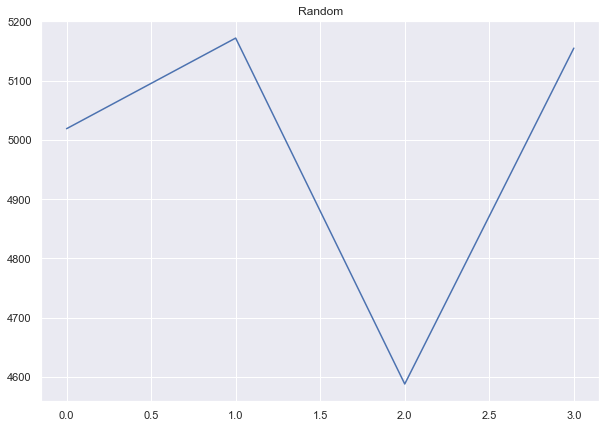

In [243]:
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(df.CRIME);
plt.title('Random');

I'll have to apply some differencing techniques (autocorrelation) to make the data more stationary...

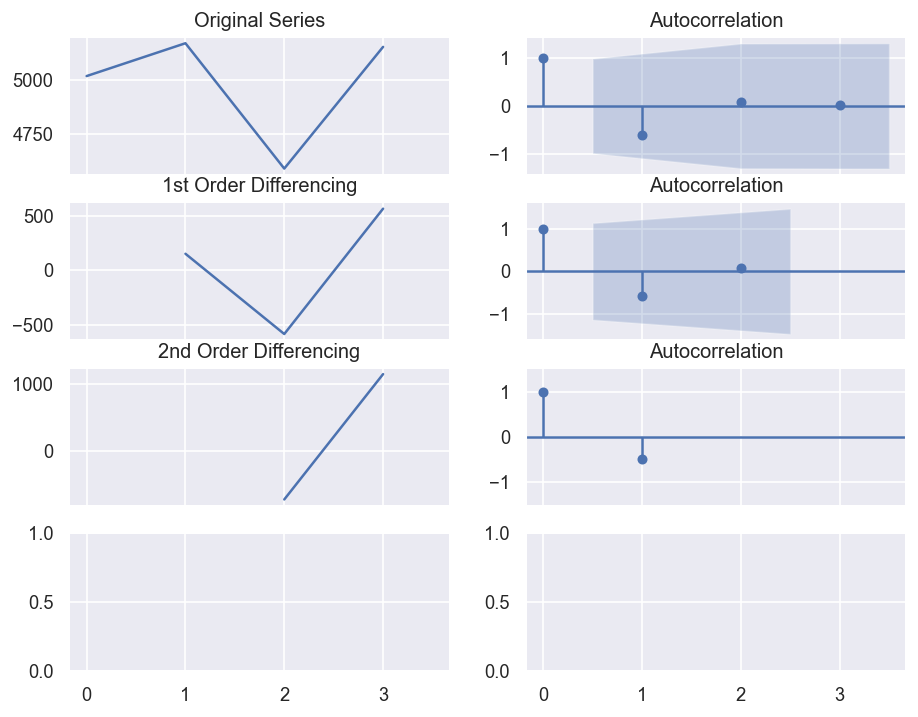

In [244]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.CRIME); axes[0, 0].set_title('Original Series')
plot_acf(df.CRIME, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.CRIME.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.CRIME.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.CRIME.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.CRIME.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

We definitely need more data points to do this type of analyis.

In [245]:
# from statsmodels.tsa.arima_model import ARIMA

In [246]:
# 1,1,1 ARIMA Model ## need more data to work!

# model = ARIMA(df.CRIME, order=(1,1,1)) 
# model_fit = model.fit(disp=0)
# print(model_fit.summary())

To run the ARIMA Model you need more data points so I am going to break the entire period of record up on a monthly basis and tally the total number of crimes.

In [247]:
ts = crime.copy()

In [248]:
%%time
ts['date'] = pd.to_datetime(ts['REPORTED_DATE']) 

Wall time: 36.1 s


In [249]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513438 entries, 0 to 513437
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   INCIDENT_ID             513438 non-null  int64         
 1   OFFENSE_ID              513438 non-null  int64         
 2   OFFENSE_CODE            513438 non-null  int64         
 3   OFFENSE_CODE_EXTENSION  513438 non-null  int64         
 4   OFFENSE_TYPE_ID         513438 non-null  object        
 5   OFFENSE_CATEGORY_ID     513438 non-null  object        
 6   FIRST_OCCURRENCE_DATE   513438 non-null  object        
 7   LAST_OCCURRENCE_DATE    180498 non-null  object        
 8   REPORTED_DATE           513438 non-null  object        
 9   INCIDENT_ADDRESS        469708 non-null  object        
 10  GEO_X                   509053 non-null  float64       
 11  GEO_Y                   509053 non-null  float64       
 12  GEO_LON                 509052

In [250]:
# ts1_crime = ts1_crime.set_index(['date']) # resetting index to date if needed

In [251]:
# ts1_crime.sort_index() # to get date range

In [252]:
monthly = pd.date_range(start='2016-01-02 01:04:00', end='2021-08-25 21:29:00', freq='MS')  # intervals for breaking up monthly
print(monthly) 

DatetimeIndex(['2016-02-01 01:04:00', '2016-03-01 01:04:00',
               '2016-04-01 01:04:00', '2016-05-01 01:04:00',
               '2016-06-01 01:04:00', '2016-07-01 01:04:00',
               '2016-08-01 01:04:00', '2016-09-01 01:04:00',
               '2016-10-01 01:04:00', '2016-11-01 01:04:00',
               '2016-12-01 01:04:00', '2017-01-01 01:04:00',
               '2017-02-01 01:04:00', '2017-03-01 01:04:00',
               '2017-04-01 01:04:00', '2017-05-01 01:04:00',
               '2017-06-01 01:04:00', '2017-07-01 01:04:00',
               '2017-08-01 01:04:00', '2017-09-01 01:04:00',
               '2017-10-01 01:04:00', '2017-11-01 01:04:00',
               '2017-12-01 01:04:00', '2018-01-01 01:04:00',
               '2018-02-01 01:04:00', '2018-03-01 01:04:00',
               '2018-04-01 01:04:00', '2018-05-01 01:04:00',
               '2018-06-01 01:04:00', '2018-07-01 01:04:00',
               '2018-08-01 01:04:00', '2018-09-01 01:04:00',
               '2018-10-

In [253]:
len(monthly) # There are 67 months where I will tally up total crime

67

In [254]:
start_date = '2016-02-01 01:04:00'
end_date = '2016-02-01 01:04:00'
mask = (ts['date'] > start_date) & (ts['date'] <= end_date)
mask

0         False
1         False
2         False
3         False
4         False
          ...  
513433    False
513434    False
513435    False
513436    False
513437    False
Name: date, Length: 513438, dtype: bool

In [255]:
count = np.count_nonzero(mask) # count number of times true

print('Month 1 total crime for all of Denver is', count)

Month 1 total crime for all of Denver is 0


Let's do this a faster way...

In [256]:
g = ts.groupby(pd.Grouper(key='date', freq='M'))

In [257]:
dfs = [group for _,group in g]

In [258]:
dfs[0] # first month

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,date
112477,20162356,20162356131501,1315,1,aggravated-assault-dv,aggravated-assault,1/2/2016 1:04:00 AM,NaN,1/2/2016 1:04:00 AM,1065 N LOGAN ST,3145584.0,1692316.0,-104.982365,39.733072,6.0,623.0,capitol-hill,1,0,2016-01-02 01:04:00
43444,20162358,20162358544100,5441,0,traffic-accident,traffic-accident,1/2/2016 1:07:00 AM,NaN,1/2/2016 1:07:00 AM,4700 BLOCK W 10TH AVE,3127158.0,1692188.0,-105.047881,39.732991,1.0,122.0,villa-park,0,1,2016-01-02 01:07:00
173107,20162308,20162308739902,7399,2,public-order-crimes-other,all-other-crimes,1/2/2016 12:23:00 AM,NaN,1/2/2016 1:20:00 AM,NaN,3157891.0,1665877.0,-104.939188,39.660291,3.0,314.0,university-hills,1,0,2016-01-02 01:20:00
414833,20162308,20162308356200,3562,0,drug-marijuana-possess,drug-alcohol,1/2/2016 12:23:00 AM,NaN,1/2/2016 1:20:00 AM,NaN,3157891.0,1665877.0,-104.939188,39.660291,3.0,314.0,university-hills,1,0,2016-01-02 01:20:00
446971,20162308,20162308531300,5313,0,curfew,public-disorder,1/2/2016 12:23:00 AM,NaN,1/2/2016 1:20:00 AM,NaN,3157891.0,1665877.0,-104.939188,39.660291,3.0,314.0,university-hills,1,0,2016-01-02 01:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137937,201666438,201666438549902,5499,2,vehicular-eluding-no-chase,all-other-crimes,1/31/2016 10:40:00 PM,NaN,1/31/2016 11:01:00 PM,W EXPOSITION AVE / S ELIOT ST,3133969.0,1681622.0,-105.023862,39.703890,4.0,412.0,athmar-park,1,0,2016-01-31 23:01:00
63402,201666472,201666472542000,5420,0,traffic-accident-dui-duid,traffic-accident,1/31/2016 11:05:00 PM,NaN,1/31/2016 11:17:00 PM,NaN,3131527.0,1685646.0,-105.032467,39.714971,4.0,411.0,barnum,0,1,2016-01-31 23:17:00
138302,201658118,201658118544100,5441,0,traffic-accident,traffic-accident,1/28/2016 5:45:00 AM,NaN,1/31/2016 11:21:00 PM,E STAPLETON N DR / N DAHLIA ST,3159742.0,1709661.0,-104.931641,39.780455,2.0,221.0,northeast-park-hill,0,1,2016-01-31 23:21:00
214156,201666493,201666493540100,5401,0,traffic-accident-hit-and-run,traffic-accident,1/31/2016 11:16:00 PM,NaN,1/31/2016 11:41:00 PM,I70 HWYWB / N HOLLY ST,3162373.0,1708949.0,-104.922296,39.778455,2.0,221.0,northeast-park-hill,0,1,2016-01-31 23:41:00


In [259]:
z = pd.Series.to_frame(crime_copy.groupby(['REPORTED_DATE'])['IS_CRIME'].count())
z

,IS_CRIME
REPORTED_DATE,
2016-01-02 01:04:00,1
2016-01-02 01:07:00,1
2016-01-02 01:20:00,3
2016-01-02 01:23:00,1
2016-01-02 01:25:00,1
...,...
2021-08-27 04:10:00,1
2021-08-27 04:17:00,2
2021-08-27 04:51:00,1


In [260]:
z.reset_index()

,REPORTED_DATE,IS_CRIME
0,2016-01-02 01:04:00,1
1,2016-01-02 01:07:00,1
2,2016-01-02 01:20:00,3
3,2016-01-02 01:23:00,1
4,2016-01-02 01:25:00,1
...,...,...
434549,2021-08-27 04:10:00,1
434550,2021-08-27 04:17:00,2
434551,2021-08-27 04:51:00,1
434552,2021-08-27 05:11:00,2


In [261]:
z.columns

Index(['IS_CRIME'], dtype='object')

In [262]:
z.iloc[0]

IS_CRIME    1
Name: 2016-01-02 01:04:00, dtype: int64

In [263]:
z.index

DatetimeIndex(['2016-01-02 01:04:00', '2016-01-02 01:07:00',
               '2016-01-02 01:20:00', '2016-01-02 01:23:00',
               '2016-01-02 01:25:00', '2016-01-02 01:36:00',
               '2016-01-02 01:45:00', '2016-01-02 01:57:00',
               '2016-01-02 02:05:00', '2016-01-02 02:06:00',
               ...
               '2021-08-27 03:28:00', '2021-08-27 03:35:00',
               '2021-08-27 03:39:00', '2021-08-27 03:56:00',
               '2021-08-27 04:04:00', '2021-08-27 04:10:00',
               '2021-08-27 04:17:00', '2021-08-27 04:51:00',
               '2021-08-27 05:11:00', '2021-08-27 06:46:00'],
              dtype='datetime64[ns]', name='REPORTED_DATE', length=434554, freq=None)

In [264]:
z['ts_date'] = z.index

In [265]:
z.head()

,IS_CRIME,ts_date
REPORTED_DATE,,
2016-01-02 01:04:00,1,2016-01-02 01:04:00
2016-01-02 01:07:00,1,2016-01-02 01:07:00
2016-01-02 01:20:00,3,2016-01-02 01:20:00
2016-01-02 01:23:00,1,2016-01-02 01:23:00
2016-01-02 01:25:00,1,2016-01-02 01:25:00


In [266]:
z['ts_date'] = pd.to_datetime(z['ts_date'])

The next cell sums up crime by month that will be better suited for a time series analysis.

In [267]:
monthly_totals = z.groupby(pd.Grouper(key="ts_date", axis=0, 
                      freq='M')).sum()
monthly_totals

,IS_CRIME
ts_date,
2016-01-31,7007
2016-02-29,6952
2016-03-31,7341
2016-04-30,7686
2016-05-31,8010
...,...
2021-04-30,7581
2021-05-31,8369
2021-06-30,8330


In [268]:
monthly_totals1 = monthly_totals.reset_index()
monthly_totals1

,ts_date,IS_CRIME
0,2016-01-31,7007
1,2016-02-29,6952
2,2016-03-31,7341
3,2016-04-30,7686
4,2016-05-31,8010
...,...,...
63,2021-04-30,7581
64,2021-05-31,8369
65,2021-06-30,8330
66,2021-07-31,8487


I can now run monthly_totals1 through my time series...

In [269]:
# check if data are stationary using Dickey Fuller test

from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(monthly_totals1.IS_CRIME, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -4.2046462521464
n_lags: 0.0006470688153032537
p-value: 0.0006470688153032537
Critial Values:
   1%, -3.5319549603840894
Critial Values:
   5%, -2.905755128523123
Critial Values:
   10%, -2.5903569458676765


The p-value is less than 0.05 so I can reject the null hypothesis "not stationary" and accept the alternative hypothesis, "stationary". My order of differencing is 1.

In [270]:
from statsmodels.tsa.arima_model import ARIMA

In [271]:
import warnings
warnings.filterwarnings("ignore")

In [272]:
model = ARIMA(monthly_totals1.IS_CRIME, order=(1,1,1)) 
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.IS_CRIME   No. Observations:                   67
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -518.090
Method:                       css-mle   S.D. of innovations            551.838
Date:                Sat, 25 Sep 2021   AIC                           1044.180
Time:                        10:23:36   BIC                           1052.999
Sample:                             1   HQIC                          1047.670
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.3316     54.887      0.079      0.937    -103.245     111.908
ar.L1.D.IS_CRIME    -0.3094      0.761     -0.406      0.684      -1.801       1.182
ma.L1.D.IS_CRIME     0.0614 

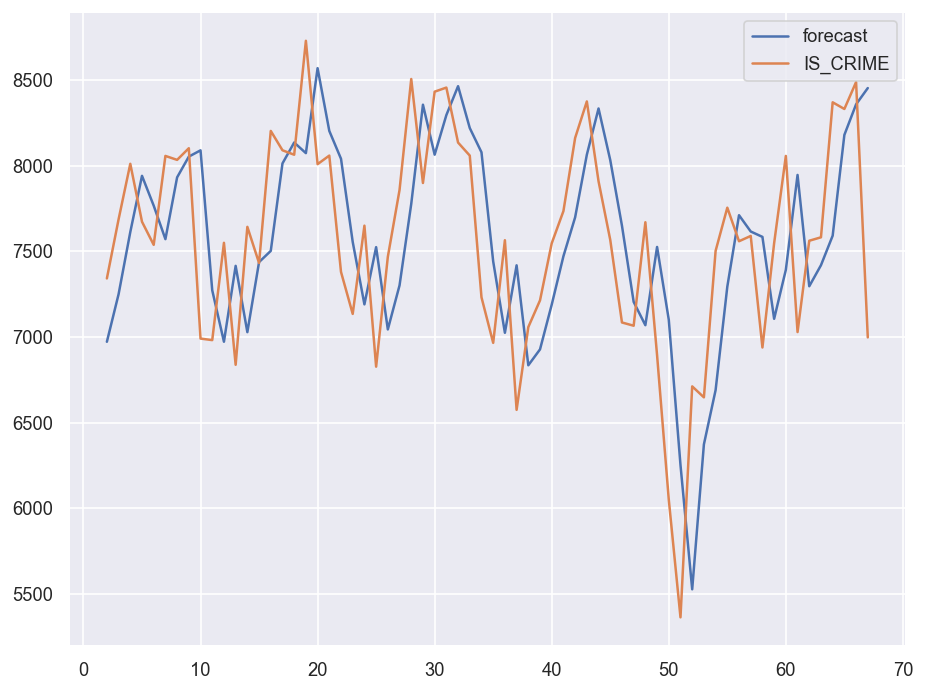

In [273]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

Next I will be building the ARIMA model on training dataset, forecasting and plotting it.

In [274]:
# split to train and test ## random sampling will not work. seq order important in time series.

#train=monthly_totals1.sample(frac=0.8,random_state=200) #random state is a seed value
#test=monthly_totals1.drop(train.index)

#len(train), len(test)

In [275]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = monthly_totals1.IS_CRIME[:51]
test = monthly_totals1.IS_CRIME[51:]

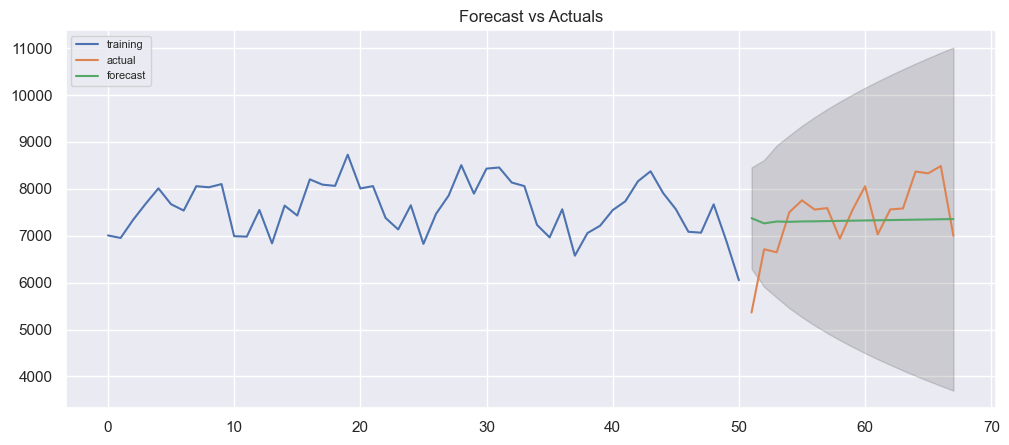

In [276]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train['IS_CRIME'], order=(1, 1, 1))  
#fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = model_fit.forecast(17, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This model isn't the best. Let's go back and fine tune the AR and MA terms in the model. Recall these were 1.

Finding the order of the MA term...

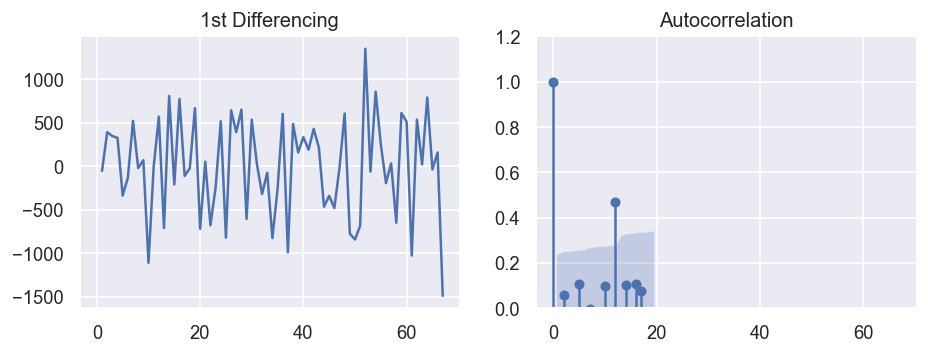

In [277]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(monthly_totals1.IS_CRIME.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(monthly_totals1.IS_CRIME.diff().dropna(), ax=axes[1])

plt.show()

A few lags in the second plot are outside of the shaded significance band, so let's try MA = 2.

Finding the order of the AR term...

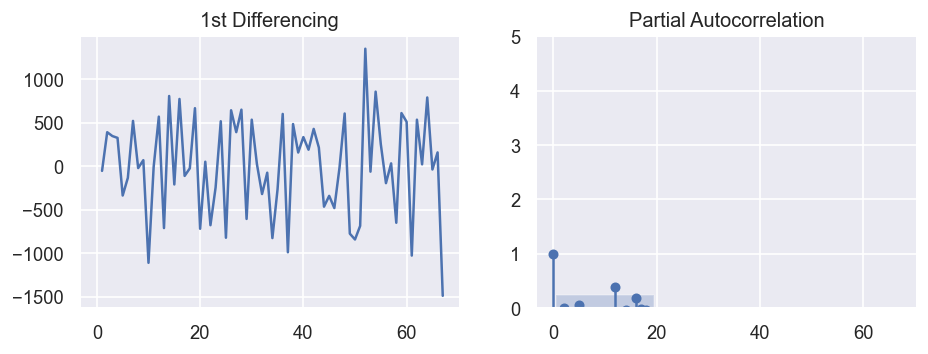

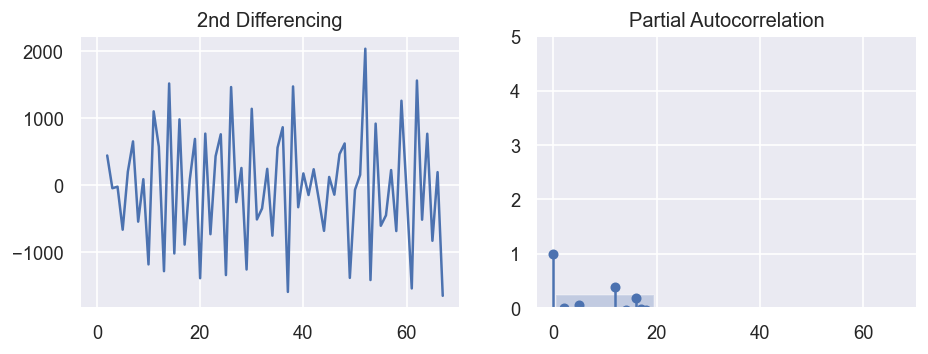

In [278]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(monthly_totals1.IS_CRIME.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(monthly_totals1.IS_CRIME.diff().dropna(), ax=axes[1])

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(monthly_totals1.IS_CRIME.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(monthly_totals1.IS_CRIME.diff().dropna(), ax=axes[1])

plt.show()

I don't see much difference between lag 1 and lag 2. Both cross the significance thresholds three times, so I was leave this value as 1. Now let's re-run the model can compare AIC scores.

d = 1, MA = 2, AR = 1

In [279]:
model = ARIMA(monthly_totals1.IS_CRIME, order=(1,2,1)) 
model_fit2 = model.fit(disp=0)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.IS_CRIME   No. Observations:                   66
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -513.096
Method:                       css-mle   S.D. of innovations            555.455
Date:                Sat, 25 Sep 2021   AIC                           1034.193
Time:                        10:23:37   BIC                           1042.952
Sample:                             2   HQIC                          1037.654
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1343      2.861     -0.397      0.692      -6.741       4.473
ar.L1.D2.IS_CRIME    -0.2390      0.126     -1.904      0.057      -0.485       0.007
ma.L1.D2.IS_CRIME    -0.

My AIC decreased, so that implies model2 is superior to model1. My p-values are a lot lower, too. 0 for MA.

In [280]:
# Forecast
fc, se, conf = model_fit2.forecast(17, alpha=0.05)  # 95% conf

In [281]:
# Accuracy metrics

# Mean Absolute Percentage Error (MAPE)
# Mean Error (ME)
# Mean Absolute Error (MAE)
# Mean Percentage Error (MPE)
# Root Mean Squared Error (RMSE)
# Lag 1 Autocorrelation of Error (ACF1)
# Correlation between the Actual and the Forecast (corr)
# Min-Max Error (minmax)

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

{'mape': 0.09856002605830586,
 'me': -335.4429483782193,
 'mae': 718.0638863029806,
 'mpe': -0.03287437220358162,
 'rmse': 903.094370984398,
 'acf1': 0.4327871316453533,
 'corr': -0.6485171625724819,
 'minmax': 0.09197807355698118}

Let's try auto tuning the parameters to see if I can improve the model ...

In [282]:
#pip install pmdarima

In [283]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model3 = pm.auto_arima(monthly_totals1.IS_CRIME, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model3.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1062.763, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1409.819, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1064.753, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1064.692, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1058.395, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1066.729, Time=0.02 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1060.550, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1049.206, Time=0.06 sec
 A

Best model:  ARIMA(0,0,2)

I don't have seasonality in my data so I can ignore the SARIMAX Results.

In [284]:
model = ARIMA(monthly_totals1.IS_CRIME, order=(0,0,2)) 
model_fit4 = model.fit(disp=0)
print(model_fit4.summary())

                              ARMA Model Results                              
Dep. Variable:               IS_CRIME   No. Observations:                   68
Model:                     ARMA(0, 2)   Log Likelihood                -518.839
Method:                       css-mle   S.D. of innovations            496.228
Date:                Sat, 25 Sep 2021   AIC                           1045.678
Time:                        10:23:38   BIC                           1054.556
Sample:                             0   HQIC                          1049.196
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7535.3733    115.343     65.330      0.000    7309.304    7761.442
ma.L1.IS_CRIME     0.5039      0.108      4.659      0.000       0.292       0.716
ma.L2.IS_CRIME     0.4321      0.120

In [285]:
# Forecast
fc, se, conf = model_fit4.forecast(17, alpha=0.05)  # 95% conf

In [286]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

{'mape': 0.0713102745712642,
 'me': 82.97171884917134,
 'mae': 492.17963610012583,
 'mpe': 0.021785601433291456,
 'rmse': 689.5630278786805,
 'acf1': 0.23747664639416854,
 'corr': 0.5812850357475415,
 'minmax': 0.06364220237156781}

I still have a very high RMSE, but that's okay. My mean absolute percentage error is only 7% and my mean percentage error is only 2%. I realized I should have set d=0 for the first model run, rather than 1, since I determined by timeseries was more or less stationary for the start.

Let's plot the forecast one last time.

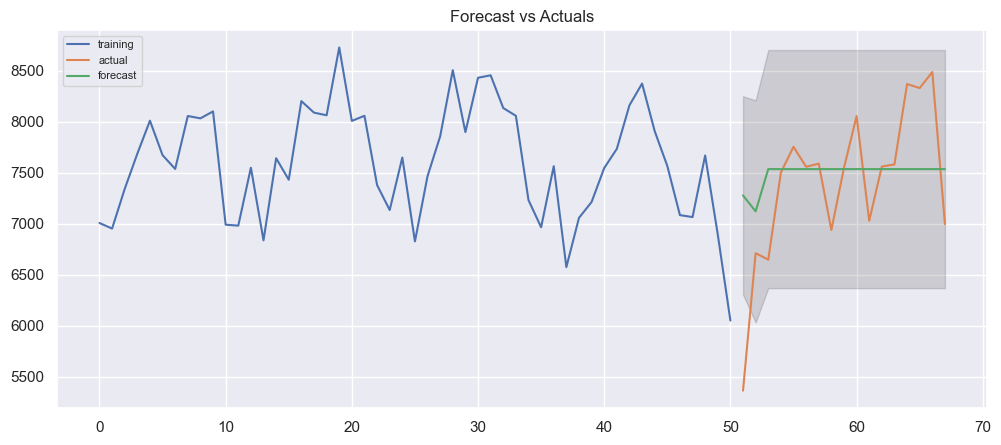

In [287]:
# Forecast
#fc, se, conf = model_fit.forecast(17, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Visually you can see the forecast has issues, but it might give a sense for trends in crime, at least in the short term. It actually caputured the significant uptick in crime after crime had been trending downward for some time (near timestep 50).